## Demanda neta

# Funciones y datos

In [1]:
# Importamos librerías
import os
import warnings
import numpy                           as np
import pandas                          as pd
import geopandas                       as gpd
import xarray                          as xr
from   matplotlib        import pyplot as plt
from   scipy             import stats
from   scipy             import optimize
from   scipy             import interpolate
from   matplotlib.ticker import StrMethodFormatter

In [2]:
# Funciones trigonométricas.
def sin(x) : return np.sin(np.radians(x))
def cos(x) : return np.cos(np.radians(x))
def tan(x) : return np.tan(np.radians(x))
def asin(x): return np.arcsin(x) * 180/np.pi
def acos(x): return np.arccos(x) * 180/np.pi
def atan(x): return np.arctan(x) * 180/np.pi

# Funciones para claves de regiones eléctricas

# Clave a país
def COUNTRY_REGION(x):
    if   x == "BCA"  : y = "MEX"
    elif x == "BCS"  : y = "MEX"
    elif x == "CEN"  : y = "MEX"
    elif x == "NES"  : y = "MEX"
    elif x == "NOR"  : y = "MEX"
    elif x == "NTE"  : y = "MEX"
    elif x == "OCC"  : y = "MEX"
    elif x == "ORI"  : y = "MEX"
    elif x == "PEN"  : y = "MEX"
    elif x == "PGE"  : y = "USA"
    elif x == "SCE"  : y = "USA"
    elif x == "SDGE" : y = "USA"
    elif x == "VEA"  : y = "USA"
    elif x == "COAST": y = "USA"
    elif x == "EAST" : y = "USA"
    elif x == "FWEST": y = "USA"
    elif x == "NORTH": y = "USA"
    elif x == "NCENT": y = "USA"
    elif x == "SOUTH": y = "USA"
    elif x == "SCENT": y = "USA"
    elif x == "WEST" : y = "USA"
    elif x == "LON" : y = "VAR"
    elif x == "LAT1" : y = "VAR"
    elif x == "LAT2"  : y = "VAR"
    elif x == "TOTAL": y = "VAR"
    return y

# Clave a país
def RTO_REGION(x):
    if   x == "BCA"  : y = "CENACE"
    elif x == "BCS"  : y = "CENACE"
    elif x == "CEN"  : y = "CENACE"
    elif x == "NES"  : y = "CENACE"
    elif x == "NOR"  : y = "CENACE"
    elif x == "NTE"  : y = "CENACE"
    elif x == "OCC"  : y = "CENACE"
    elif x == "ORI"  : y = "CENACE"
    elif x == "PEN"  : y = "CENACE"
    elif x == "PGE"  : y = "CAISO"
    elif x == "SCE"  : y = "CAISO"
    elif x == "SDGE" : y = "CAISO"
    elif x == "VEA"  : y = "CAISO"
    elif x == "COAST": y = "ERCOT"
    elif x == "EAST" : y = "ERCOT"
    elif x == "FWEST": y = "ERCOT"
    elif x == "NORTH": y = "ERCOT"
    elif x == "NCENT": y = "ERCOT"
    elif x == "SOUTH": y = "ERCOT"
    elif x == "SCENT": y = "ERCOT"
    elif x == "WEST" : y = "ERCOT"
    elif x == "LON" : y = "VAR"
    elif x == "LAT1" : y = "VAR"
    elif x == "LAT2"  : y = "VAR"
    elif x == "TOTAL": y = "VAR"
    return y

3, 4, 14, 15, 16, 17, 18, 19, 20, 21

# Clave a número
def NUM_REGION(x):
    if   x == "BCA"  : y = 1
    elif x == "BCS"  : y = 2
    elif x == "CEN"  : y = 3
    elif x == "NES"  : y = 4
    elif x == "NOR"  : y = 5
    elif x == "NTE"  : y = 6
    elif x == "OCC"  : y = 7
    elif x == "ORI"  : y = 8
    elif x == "PEN"  : y = 9
    elif x == "PGE"  : y = 10
    elif x == "SCE"  : y = 11
    elif x == "SDGE" : y = 12
    elif x == "VEA"  : y = 13
    elif x == "COAST": y = 14
    elif x == "EAST" : y = 15
    elif x == "FWEST": y = 16
    elif x == "NORTH": y = 17
    elif x == "NCENT": y = 18
    elif x == "SOUTH": y = 19
    elif x == "SCENT": y = 20
    elif x == "WEST" : y = 21
    elif x == "LON" : y = 22
    elif x == "LAT1" : y = 23
    elif x == "LAT2"  : y = 24
    elif x == "TOTAL": y = 25
    return y

# Número a clave
def NUM_REGION_r(x):
    if   x == 1 : y = "BCA"
    elif x == 2 : y = "BCS"
    elif x == 3 : y = "CEN"
    elif x == 4 : y = "NES"
    elif x == 5 : y = "NOR"
    elif x == 6 : y = "NTE"
    elif x == 7 : y = "OCC"
    elif x == 8 : y = "ORI"
    elif x == 9 : y = "PEN"
    elif x == 10: y = "PGE"
    elif x == 11: y = "SCE"
    elif x == 12: y = "SDGE"
    elif x == 13: y = "VEA"
    elif x == 14: y = "COAST"
    elif x == 15: y = "EAST"
    elif x == 16: y = "FWEST"
    elif x == 17: y = "NORTH"
    elif x == 18: y = "NCENT"
    elif x == 19: y = "SOUTH"
    elif x == 20: y = "SCENT"
    elif x == 21: y = "WEST"
    elif x == 22: y = "LON"
    elif x == 23: y = "LAT1"
    elif x == 24: y = "LAT2"
    elif x == 25: y = "TOTAL"
    return y

# Número a nombre
def NAME_REGION_r(x):
    if   x == 1 : y = "Baja California"
    elif x == 2 : y = "Baja California Sur"
    elif x == 3 : y = "Centro"
    elif x == 4 : y = "Noreste"
    elif x == 5 : y = "Noroeste"
    elif x == 6 : y = "Norte"
    elif x == 7 : y = "Occidente"
    elif x == 8 : y = "Oriente"
    elif x == 9 : y = "Peninsular"
    elif x == 10: y = "Pacific G&E"
    elif x == 11: y = "Southern Cal Edison"
    elif x == 12: y = "San Diego G&E"
    elif x == 13: y = "Valley Electric Assn"
    elif x == 14: y = "Coast"
    elif x == 15: y = "East"
    elif x == 16: y = "Far West"
    elif x == 17: y = "North"
    elif x == 18: y = "North Central"
    elif x == 19: y = "South"
    elif x == 20: y = "South Central"
    elif x == 21: y = "West"
    elif x == 22: y = "Longitudinal"
    elif x == 23: y = "Latitudinal 1"
    elif x == 24: y = "Latitudinal 2"
    elif x == 25: y = "Total"
    return y

In [3]:
# Casos de orientación de sistemas fotovoltaico

# Casos a estudiar
cases = [ "south_no_track", "west_no_track", "east_no_track",
    "1_track", "2_track", "bifacial_vertical_west_main",
    "bifacial_vertical_east_main", "bifacial_vertical_west_back",
    "bifacial_vertical_east_back", "bifacial_south_back" ]
# Variables fotovoltaicas por caso
# Inclinación
track_tilt       =   [ f"{x}_Tilt"               for x in cases ]
# Azimuth
track_azimuth    =   [ f"{x}_Azimuth"            for x in cases ]
# Ángulo entre el panel y el sol, Angle of Incidence
track_AOI        =   [ f"{x}_Angle_of_Incidence" for x in cases ]
# Radiación incidente en el panel [W/m^2], Plane of Array Irradiace
track_POA        =   [ f"{x}_POA"                for x in cases ]
# Producción fotovoltaica por kilowatt de capacidad [W/kWp]
track_P_mp       = ( [ f"{x}_P_mp"               for x in cases ]
    + [ "bifacial_vertical_west_P_mp",
        "bifacial_vertical_east_P_mp",
        "bifacial_south_P_mp" ] )
# Producción para cada caso
prod_n           = track_P_mp[0:5] + track_P_mp[10:]
# Factor bifacial
P_bf = [ 1, 1, 1, 1, 1, 1, 1, 0.7, 0.7, 0.7 ]

prod_n_dist = [f"{x}_distributed" for x in prod_n]
prod_n_centr = [f"{x}_central" for x in prod_n]
prod_n_total = [f"{x}_total" for x in prod_n]
prod_n_i = prod_n + prod_n_dist + prod_n_centr + prod_n_total

In [4]:
# Datos de radiación

# Rutas de archivos
dir_r = "../results/"
ds_c = xr.open_dataset(f"{dir_r}full_disc_region_2022.nc")
ds_c["timezone_round"] = np.around(ds_c["timezone"]).astype(int)
for t in np.unique(ds_c["timezone_round"]): ds_c = xr.where(
    ds_c["timezone_round"] == t, ds_c.shift({"time": t}), ds_c )
ds_c

<xarray.Dataset> Size: 34MB
Dimensions:                                  (REGION: 24, time: 8760)
Coordinates:
  * REGION                                   (REGION) float64 192B 1.0 ... 24.0
  * time                                     (time) datetime64[ns] 70kB 2022-...
Data variables: (12/40)
    south_no_track_P_mp                      (REGION, time) float32 841kB 0.0...
    west_no_track_P_mp                       (REGION, time) float32 841kB 0.0...
    east_no_track_P_mp                       (REGION, time) float32 841kB 0.0...
    1_track_P_mp                             (REGION, time) float32 841kB 0.0...
    2_track_P_mp                             (REGION, time) float32 841kB 0.0...
    bifacial_vertical_west_P_mp              (REGION, time) float32 841kB 0.0...
    ...                                       ...
    1_track_P_mp_total                       (REGION, time) float32 841kB 0.0...
    2_track_P_mp_total                       (REGION, time) float32 841kB 0.0...
    bifacial_vertical_west_P_mp_total        (REGION, time) float32 841kB 0.0...
    bifacial_vertical_east_P_mp_total        (REGION, time) float32 841kB 0.0...
    bifacial_south_P_mp_total                (REGION, time) float32 841kB 0.0...
    timezone_round                           (REGION) int64 192B -8 -7 ... -8 -7

# Demanda

In [5]:
# Cargamos la demanda

# CENACE
# Ruta de la demanda para México
path_d = "../data/Demanda/"
path_f = f"{path_d}Mexico/Original/"
# Cargamos cada archivo
df_i = []
files = os.listdir(path_f)
files.sort()
for f in files:
    if f[0] != ".":
        df_0 = pd.read_csv(path_f + f, skiprows = 8,
            na_values = "               ---" )
        # Asignamos columnas
        df_0.columns = ["Sistema", "Area", "Hora", "Generacion (MWh)",
            "Importacion Total (MWh)", "Exportacion Total (MWh)",
            "Intercambio neto entre Gerencias (MWh)",
            "Estimacion de Demanda por Balance (MWh)"]
        df_0 = df_0[ ["Sistema", "Area", "Hora",
            "Estimacion de Demanda por Balance (MWh)"] ]
        df_0["Area"] = df_0["Area"].where(
            df_0["Area"]!="BCA", df_0["Sistema"] )
        df_0 = df_0.drop(columns = "Sistema")
        # Damos formato a la fecha
        df_0["Fecha"] = f[40:50]
        df_i.append(df_0)
df_cenace = pd.concat(df_i)
df_i = []
for c in df_cenace["Area"].unique():
    df_i.append(df_cenace[df_cenace["Area"] == c].copy())
for i in range(len(df_i)):
    df_i[i]["time"] = pd.date_range("2022-01-01", periods = 8760, freq = "h")
demanda = "Estimacion de Demanda por Balance (MWh)"
df_cenace = pd.concat(df_i).rename( columns =
    {demanda: "Demand", "Area": "REGION"} )
df_cenace["REGION"] = df_cenace["REGION"].apply(NUM_REGION)
df_cenace = df_cenace.set_index(["REGION", "time"]).drop(
    columns = ["Fecha", "Hora"]).sort_index()
# Interpolamos para rellenar el apagón en Yucatán
a = df_cenace.iloc[74214: 74220].values
df_cenace.iloc[74214: 74220] = interpolate.CubicSpline([0, 1, 4, 5],
    a[[0, 1, 4, 5]])([0, 1, 2, 3, 4, 5])

# ERCOT
path_ercot = f"{path_d}ERCOT/Native_Load_2022.xlsx"
df_ercot = pd.read_excel(path_ercot)
df_ercot["time"] = pd.date_range("2022-01-01", periods = 8760, freq = "h")
df_ercot = df_ercot.set_index("time").drop(columns = ["Hour Ending", "ERCOT"])
df_ercot = df_ercot.stack().reset_index(level = 1).rename(
    columns = {"level_1": "REGION", 0: "Demand"})
df_ercot["REGION"] = df_ercot["REGION"].apply(NUM_REGION)
df_ercot = df_ercot.set_index("REGION", append = True
    ).swaplevel("REGION", "time")
# Interpolamos para rellenar el apagón en Far West
a = df_ercot.iloc[65298:65298+8*6:8].values
df_ercot.iloc[65298:65298+8*6:8] = interpolate.CubicSpline([0, 1, 4, 5],
    a[[0, 1, 4, 5]])([0, 1, 2, 3, 4, 5])

#CAISO
path_caiso = f"{path_d}CAISO/historicalemshourlyload-2022.xlsx"
df_caiso = pd.read_excel(path_caiso)
df_caiso["time"] = pd.date_range("2022-01-01", periods = 8760, freq = "h")
df_caiso = df_caiso.set_index("time").drop(columns = ["Date", "HR", "CAISO"])
df_caiso = df_caiso.stack().reset_index(level = 1).rename(
    columns = {"level_1": "REGION", 0: "Demand"})
df_caiso["REGION"] = df_caiso["REGION"].apply(NUM_REGION)
df_caiso = df_caiso.set_index("REGION", append = True
    ).swaplevel("REGION", "time")

# Unimos las regiones
ds_d = pd.concat( [df_ercot, df_caiso, df_cenace]
    ).sort_index().to_xarray()

ds_d["timezone_round"] = ds_c["timezone_round"]
# Datos agregados para generación
# Agrupamiento longitudinal
ds_i = ds_d.where(ds_d["REGION"].isin([1, 2, 4, 5, 6, 14, 19]))
for t in np.unique(ds_i["timezone_round"]): 
    if not np.isnan(t): ds_i = xr.where(
        ds_i["timezone_round"] == t, ds_i.shift({"time": -(int(t)+8)}), ds_i )
ds_i["REGION"] = ds_i["REGION"].where(ds_i["REGION"] == 22, 22)
ds_d_2 = ds_i.groupby("REGION").sum()
# Agrupamiento latitudinal
ds_i = ds_d.where(ds_d["REGION"].isin([1, 2, 10, 11, 12, 13]))
for t in np.unique(ds_i["timezone_round"]): 
    if not np.isnan(t): ds_i = xr.where(
        ds_i["timezone_round"] == t, ds_i.shift({"time": -(int(t)+8)}), ds_i )
ds_i["REGION"] = ds_i["REGION"].where(ds_i["REGION"] == 23, 23)
ds_d_3 = ds_i.groupby("REGION").sum()
# Agrupamiento total
ds_i = ds_d.copy()
for t in np.unique(ds_i["timezone_round"]): 
    if not np.isnan(t): ds_i = xr.where(
        ds_i["timezone_round"] == t, ds_i.shift({"time": -(int(t)+8)}), ds_i )
ds_i["REGION"] = ds_i["REGION"].where(ds_i["REGION"] == 24, 24)
ds_d_4 = ds_i.groupby("REGION").sum()
ds_d = xr.concat([ds_d, ds_d_2, ds_d_3, ds_d_4], "REGION")
ds_d["REGION"] = ds_d["REGION"].astype(int)

ds_d["hour"] = ds_d["time"].dt.hour.copy()
ds_d["dayofyear"] = ds_d["time"].dt.dayofyear.copy()
ds_c["hour"] = ds_c["time"].dt.hour.copy()
ds_c["dayofyear"] = ds_c["time"].dt.dayofyear.copy()

# Unimos demanda y producción
ds_c["Demand"] = ds_d["Demand"]

In [6]:
# Suprimimos las alertas de scipy
with warnings.catch_warnings(action="ignore"):

    # Minimun capacity to reach zero net demand during duck's belly
    prod_n_cap = [f"{x}_capacity" for x in prod_n_i]
    # Función que determina la demanda mínima en términos de la capacidad
    def demand(x, v, c):
        return (ds_c["Demand"] - ds_c[v] * x).sel({"REGION": c}).pipe(np.min)
    # Encontramos la capacidad que ocasiona una demanda nula
    for i, v in enumerate(prod_n_i):
        n = []
        x0 = 5e7
        for c in ds_c["REGION"].values: n.append(optimize.fsolve(
            demand, x0 = x0, args = (v, c))[0] / 1000)
        ds_c[prod_n_cap[i]] = ("REGION", n)
    ds_c["min_capacity"] = ( "REGION",
        ds_c[prod_n_cap].to_dataframe().min(axis = 1).values )

    # Net demand with capacity that produces zero demand
    # Demanda neta [MW]
    names_dn = ["South-facing", "West-facing", "East-facing",
        "1 axis tracking", "2 axis tracking",
        "Bifacial, vertical, west-facing", "Bifacial, vertical, east-facing",
        "Bifacial, south facing", ]
    names_dn_t = ( names_dn + [f"{x}_distributed" for x in names_dn]
        + [f"{x}_central" for x in names_dn]
        + [f"{x}_total" for x in names_dn] )
    track_net_demand = [ f"{x}_net_demand"  for x in names_dn_t ]
    ds_c[track_net_demand] = ( ds_c["Demand"]
        - ds_c[prod_n_i] * ds_c[prod_n_cap].rename(
        dict(zip(prod_n_cap, prod_n_i))) * 1000 )
    # Net demand with same capacity for all cases
    prod_dn_min = [f"{x}_min" for x in track_net_demand]
    ds_c[prod_dn_min] = ( ds_c["Demand"]
        - ds_c[prod_n_i] * ds_c["min_capacity"] * 1000 )
    # Energy produced
    ener = [ f"{x}_energy" for x in prod_n_i ]
    ds_c[ener] = ( ds_c[prod_n_i]
        * ds_c[prod_n_cap].rename(dict(zip(prod_n_cap, prod_n_i))) / 1e3
        ).sum("time")
    # Demand ramp
    track_net_demand_dt = [ f"{x}_dt" for x in track_net_demand ]
    ds_c[track_net_demand_dt] = ( ds_c[track_net_demand]
        - ds_c[track_net_demand].shift(time = 1) )
    ds_c["Demand_dt"] = ( ds_c["Demand"]
        - ds_c["Demand"].shift(time = 1) )
    # Capacity factor
    cap_f = [ f"{x}_capacity_factor" for x in prod_n_i ]
    ds_c[cap_f] = ( 100 * 1000 * ds_c[ener] / ( 24 * 365
        * ds_c[prod_n_cap].rename(dict(zip(prod_n_cap, ener))) ) )

    # Demanda máxima
    track_net_demand_max = [f"{x}_max_demand" for x in ["No_PV"] + names_dn_t]
    ds_c[track_net_demand_max] = ds_c[ ["Demand"] + track_net_demand
        ].pipe(np.abs).max("time")
    # Demanda mínima
    track_net_demand_min = [f"{x}_min_demand" for x in ["No_PV"] + names_dn_t]
    ds_c[track_net_demand_min] = ds_c[ ["Demand"] + track_net_demand
        ].pipe(np.abs).min("time")
    # Rampa máxima
    track_net_demand_dt_max = [f"{x}_max_ramp" for x in ["No_PV"] + names_dn_t]
    ds_c[track_net_demand_dt_max] = ds_c[ ["Demand"] + track_net_demand_dt
        ].pipe(np.abs).max("time")
    # Rampa mínima
    track_net_demand_dt_min = [f"{x}_min_ramp" for x in ["No_PV"] + names_dn_t]
    ds_c[track_net_demand_dt_min] = ds_c[ ["Demand"] + track_net_demand_dt
        ].pipe(np.abs).min("time")

    # Producción total
    prod_n_sum = [f"{x}_sum" for x in prod_n]
    prod_n_dist_sum = [f"{x}_sum" for x in prod_n_dist]
    prod_n_centr_sum = [f"{x}_sum" for x in prod_n_centr]
    prod_n_total_sum = [f"{x}_sum" for x in prod_n_total]
    prod_n_sum_i = ( prod_n_sum + prod_n_dist_sum
        + prod_n_centr_sum + prod_n_total_sum )
    ds_c[prod_n_sum_i] = (
        ds_c[prod_n + prod_n_dist + prod_n_centr + prod_n_total]).sum("time")

n = (ds_c[track_net_demand_min[1:]]>1e-10).to_array().sum().values+0
print(f"Number of failed points: {n}")

Number of failed points: 0


# Análisis configuraciones

In [7]:
# Determinamos la configuración ideal
indicators = [ "Photovoltaic generation per GWp", "Maximum capacity",
    "Photovoltaic generation", "Capacity factor",
    "Maximum load", "Maximum load ramp" ]
results = [ prod_n_sum_i[-8:], prod_n_cap[-8:], ener[-8:], cap_f[-8:],
    track_net_demand_max[-8:], track_net_demand_dt_max[-8:] ]
# Ponderación
weights = [1] * len(indicators)
order = [0, 0, 0, 0, 1, 1]

# Escogemos las variables relevantes a ponderar
indicators = indicators[1:3] + indicators[5:6]
results    = results[1:3] + results[5:6]
weights    = weights[1:3] + weights[5:6]
order      = order[1:3] + order[5:6]

# Iteramos para cada región
df_i = []
for i, c in enumerate( ds_c["REGION"].values ):
    df = ds_c.sel({"REGION": c}).drop_vars("REGION").to_dataframe()
    df_ind = pd.DataFrame( index = names_dn,
        columns = ["REGION", "KIND"] + indicators )
    df_ind.index.name = "CONFIGURATION"
    df_ind["REGION"] = c
    df_ind["KIND"] = "Value"
    df_ind_val = df_ind.copy()
    df_ind_val["KIND"] = "Rank"

    # Asignamos el rank percentile al conjunto de configuraciones
    for i, col in enumerate(indicators):
        df_ind[col] = df[results[i]].iloc[0].values
        df_ind_val[col] = np.abs( 100 * order[i]
            - stats.percentileofscore(df_ind[col], df_ind[col]) )
    df_ind_val["Score"] = ( df_ind_val[indicators].sum(axis = 1)
        / df_ind_val[indicators].shape[1] )

    # Unimos valores y ranks
    df_ind = df_ind.reset_index().set_index(
        ["REGION", "KIND", "CONFIGURATION"] )
    df_ind_val = df_ind_val.reset_index().set_index(
        ["REGION", "KIND", "CONFIGURATION"] )
    df_i.append(pd.concat([df_ind, df_ind_val]))

# Calculamos la configuración con mejor rank
score = pd.concat(df_i).sort_index()
max_score = score.loc[ slice(None), "Rank", slice(None)
    ].sort_values(["REGION", "Score"], ascending = (True, False) 
    ).iloc[0::8].reset_index(level = "CONFIGURATION")["CONFIGURATION"]
pd.options.display.float_format = "{:,.1f}".format
max_values = score.sort_values(["REGION", "KIND", "CONFIGURATION"]).copy()
a = max_values.loc[(slice(None), "Rank", slice(None)), "Score"].values
max_values = max_values.loc[(slice(None), "Value", slice(None))].copy()
max_values["Score"] = a
max_values = max_values.sort_values(["REGION", "Score"],
    ascending = (True, False) ).iloc[::8].reset_index()
#max_values.index = max_values.index.apply(NUM_REGION_r)
max_values["REGION"] = max_values["REGION"].apply(NUM_REGION_r)
max_values = max_values.set_index(["REGION", "CONFIGURATION"])
max_values.columns = [max_values.columns[0] + " [GW]",
    max_values.columns[1] + " [TWh]", max_values.columns[2] + " [GW/h]",
    max_values.columns[3]]
max_values

,,Maximum capacity [GW],Photovoltaic generation [TWh],Maximum load ramp [GW/h],Score
REGION,CONFIGURATION,,,,
BCA,1 axis tracking,1.6,3.4,768.6,62.5
BCS,"Bifacial, vertical, east-facing",0.4,0.6,180.6,66.7
CEN,East-facing,7.2,11.9,"2,247.9",66.7
NES,West-facing,6.1,9.2,"1,823.0",66.7
NOR,1 axis tracking,2.6,5.4,"1,119.6",62.5
NTE,"Bifacial, vertical, west-facing",4.4,5.7,"1,934.6",62.5
OCC,"Bifacial, vertical, west-facing",12.1,16.3,"6,777.6",62.5
ORI,East-facing,7.1,11.0,"1,715.3",66.7
PEN,"Bifacial, vertical, west-facing",2.4,2.9,"1,017.4",62.5


In [ ]:
# Comparación de regiones agrupadas.
a = max_values.iloc[[0, 1, 3, 4, 5, 13, 18]].sum()
b = max_values.iloc[[0, 1, 9, 10, 11, 12]].sum()
c = max_values.iloc[[2, 3, 13, 14, 15, 16, 17, 18, 19, 20]].sum()
d = max_values.iloc[:-4].sum()
comp = pd.concat([a, b, c, d], axis = 1).T
comp.index = ["LON", "LAT1", "LAT2", "TOTAL"]
comp

,Maximum capacity [GW],Photovoltaic generation [TWh],Maximum load ramp [GW/h],Score
LON,32.1,54.1,"13,741.9",441.7
LAT,21.2,41.8,"10,239.4",400.0
TOTAL,109.3,183.4,"49,009.9","1,350.0"


In [9]:
# Comparación contra orientación al sur.
diff_south = (max_values - score.iloc[14::16].values).drop(columns = "Score")

In [10]:
# Promedio de cambio contra orientación al sur.
diff_south.iloc[:].mean()

Maximum capacity [GW]             0.6
Photovoltaic generation [TWh]     1.9
Maximum load ramp [GW/h]        366.1
dtype: float64

In [11]:
# Comparamos las calificaciones de una región
score.loc[24]

Maximum capacity  \
KIND  CONFIGURATION                                       
Rank  1 axis tracking                              50.0   
      2 axis tracking                              12.5   
      Bifacial, south facing                       25.0   
      Bifacial, vertical, east-facing              87.5   
      Bifacial, vertical, west-facing             100.0   
      East-facing                                  62.5   
      South-facing                                 37.5   
      West-facing                                  75.0   
Value 1 axis tracking                             115.6   
      2 axis tracking                             109.9   
      Bifacial, south facing                      110.9   
      Bifacial, vertical, east-facing             177.0   
      Bifacial, vertical, west-facing             181.0   
      East-facing                                 118.6   
      South-facing                                115.0   
      West-facing                                 120.5   

                                       Photovoltaic generation  \
KIND  CONFIGURATION                                              
Rank  1 axis tracking                                     87.5   
      2 axis tracking                                    100.0   
      Bifacial, south facing                              50.0   
      Bifacial, vertical, east-facing                     62.5   
      Bifacial, vertical, west-facing                     75.0   
      East-facing                                         12.5   
      South-facing                                        37.5   
      West-facing                                         25.0   
Value 1 axis tracking                                    228.7   
      2 axis tracking                                    247.3   
      Bifacial, south facing                             210.4   
      Bifacial, vertical, east-facing                    212.9   
      Bifacial, vertical, west-facing                    216.2   
      East-facing                                        178.0   
      South-facing                                       204.8   
      West-facing                                        178.9   

                                       Maximum load ramp  Score  
KIND  CONFIGURATION                                              
Rank  1 axis tracking                               37.5   58.3  
      2 axis tracking                               25.0   45.8  
      Bifacial, south facing                        50.0   41.7  
      Bifacial, vertical, east-facing               12.5   54.2  
      Bifacial, vertical, west-facing                0.0   58.3  
      East-facing                                   87.5   54.2  
      South-facing                                  62.5   45.8  
      West-facing                                   75.0   58.3  
Value 1 axis tracking                           36,874.6    NaN  
      2 axis tracking                           44,222.8    NaN  
      Bifacial, south facing                    34,425.4    NaN  
      Bifacial, vertical, east-facing           48,358.2    NaN  
      Bifacial, vertical, west-facing           56,829.5    NaN  
      East-facing                               26,263.3    NaN  
      South-facing                              34,339.1    NaN  
      West-facing                               29,436.1    NaN

In [130]:
cluster = max_values.reset_index().loc[:20,["REGION", "CONFIGURATION"]]
cluster["RTO"] = cluster["REGION"].apply(RTO_REGION)
cluster["COUNTRY"] = cluster["REGION"].apply(COUNTRY_REGION)
cluster = cluster.set_index("REGION")

regions_dir = "../results/Mapas/Electric_regions"
gdf = gpd.read_file(regions_dir).rename(
    columns = {"ID_NAME":"REGION"}).replace({"NER": "NES"})
gdf[["LON", "LAT"]] = gdf.to_crs("ESRI:54009"
    ).centroid.to_crs(4326).get_coordinates()
for index, row in gdf.iterrows():  
    neighbors = gdf[gdf.geometry.touches(row["geometry"])]["REGION"].tolist() 
    gdf.at[index, "NEIGHBORS"] = ", ".join(neighbors)

cluster = cluster.join(gdf[["REGION", "NAME", "TIME_ZONE",
    "LON", "LAT", "NEIGHBORS"]].set_index("REGION"))
cluster.loc["BCA", "NEIGHBORS"]   += ", SDGE"
cluster.loc["BCS", "NEIGHBORS"]   += "BCA, NOR"
cluster.loc["CEN", "NEIGHBORS"]   += ", ORI, NES"
cluster.loc["NES", "NEIGHBORS"]   += ", CEN, ORI, FWEST, WEST, SOUTH"
cluster.loc["NOR", "NEIGHBORS"]   += ", NTE, BCS"
cluster.loc["NTE", "NEIGHBORS"]   += ", OCC, NOR, FWEST"
cluster.loc["OCC", "NEIGHBORS"]   += ", NTE"
cluster.loc["ORI", "NEIGHBORS"]   += ", CEN, NES"
cluster.loc["SCE", "NEIGHBORS"]   += ", VEA, SDGE"
cluster.loc["SDGE", "NEIGHBORS"]  += "SCE, BCA"
cluster.loc["VEA", "NEIGHBORS"]   += "SCE, PGE"
cluster.loc["PGE", "NEIGHBORS"]   += ", VEA"
cluster.loc["COAST", "NEIGHBORS"] += ", SOUTH"
cluster.loc["FWEST", "NEIGHBORS"] += ", NTE, NES"
cluster.loc["NCENT", "NEIGHBORS"] += ", COAST"
cluster.loc["SOUTH", "NEIGHBORS"] += ", COAST, NES"
cluster.loc["WEST", "NEIGHBORS"]  += ", SCENT, NES"

cluster["NEIGHBORS_CONF"] = 0.0
for row in cluster.itertuples():
    a = (cluster.loc[cluster.loc[row.Index, "NEIGHBORS"].split(", ")
        ]["CONFIGURATION"] == cluster.loc[row.Index, "CONFIGURATION"])
    cluster.loc[row.Index, "NEIGHBORS_CONF"] = 100 * a.sum() / a.count()
cluster

cluster

,CONFIGURATION,RTO,COUNTRY,NAME,TIME_ZONE,LON,LAT,NEIGHBORS,NEIGHBORS_CONF
REGION,,,,,,,,,
BCA,1 axis tracking,CENACE,MEX,Baja California,-8,-115.1,30.5,"NOR, SDGE",50.0
BCS,"Bifacial, vertical, east-facing",CENACE,MEX,Baja California Sur,-7,-112.0,25.9,"BCA, NOR",0.0
CEN,East-facing,CENACE,MEX,Centro,-6,-100.0,18.8,"OCC, ORI, NES",33.3
NES,West-facing,CENACE,MEX,Noreste,-6,-100.1,25.4,"OCC, NTE, CEN, ORI, FWEST, WEST, SOUTH",28.6
NOR,1 axis tracking,CENACE,MEX,Noroeste,-7,-109.9,28.5,"OCC, BCA, NTE, BCS",25.0
NTE,"Bifacial, vertical, west-facing",CENACE,MEX,Norte,-6,-105.7,27.4,"NES, OCC, NOR, FWEST",25.0
OCC,"Bifacial, vertical, west-facing",CENACE,MEX,Occidente,-6,-102.5,21.4,"CEN, ORI, NOR, NES, NTE",20.0
ORI,East-facing,CENACE,MEX,Oriente,-6,-95.9,17.7,"OCC, PEN, CEN, NES",25.0
PEN,"Bifacial, vertical, west-facing",CENACE,MEX,Peninsular,-6,-89.2,19.6,ORI,0.0


In [132]:
cluster.sort_values("NEIGHBORS_CONF", ascending = False).head(4)

,CONFIGURATION,RTO,COUNTRY,NAME,TIME_ZONE,LON,LAT,NEIGHBORS,NEIGHBORS_CONF
REGION,,,,,,,,,
NORTH,"Bifacial, south facing",ERCOT,USA,North,-6,-99.2,33.8,"EAST, NCENT, WEST",66.7
FWEST,West-facing,ERCOT,USA,Far West,-6,-102.9,31.0,"WEST, NTE, NES",66.7
BCA,1 axis tracking,CENACE,MEX,Baja California,-8,-115.1,30.5,"NOR, SDGE",50.0
EAST,"Bifacial, south facing",ERCOT,USA,East,-6,-95.5,31.8,"COAST, NORTH, NCENT, SCENT",50.0


In [133]:
cluster.sort_values("COUNTRY")

,CONFIGURATION,RTO,COUNTRY,NAME,TIME_ZONE,LON,LAT,NEIGHBORS,NEIGHBORS_CONF
REGION,,,,,,,,,
BCA,1 axis tracking,CENACE,MEX,Baja California,-8,-115.1,30.5,"NOR, SDGE",50.0
BCS,"Bifacial, vertical, east-facing",CENACE,MEX,Baja California Sur,-7,-112.0,25.9,"BCA, NOR",0.0
CEN,East-facing,CENACE,MEX,Centro,-6,-100.0,18.8,"OCC, ORI, NES",33.3
NES,West-facing,CENACE,MEX,Noreste,-6,-100.1,25.4,"OCC, NTE, CEN, ORI, FWEST, WEST, SOUTH",28.6
NOR,1 axis tracking,CENACE,MEX,Noroeste,-7,-109.9,28.5,"OCC, BCA, NTE, BCS",25.0
NTE,"Bifacial, vertical, west-facing",CENACE,MEX,Norte,-6,-105.7,27.4,"NES, OCC, NOR, FWEST",25.0
OCC,"Bifacial, vertical, west-facing",CENACE,MEX,Occidente,-6,-102.5,21.4,"CEN, ORI, NOR, NES, NTE",20.0
ORI,East-facing,CENACE,MEX,Oriente,-6,-95.9,17.7,"OCC, PEN, CEN, NES",25.0
PEN,"Bifacial, vertical, west-facing",CENACE,MEX,Peninsular,-6,-89.2,19.6,ORI,0.0


In [134]:
cluster.sort_values("RTO")

,CONFIGURATION,RTO,COUNTRY,NAME,TIME_ZONE,LON,LAT,NEIGHBORS,NEIGHBORS_CONF
REGION,,,,,,,,,
SCE,1 axis tracking,CAISO,USA,Southern California Edison,-8,-116.9,35.4,"PGE, VEA, SDGE",0.0
VEA,"Bifacial, vertical, west-facing",CAISO,USA,Valley Electric Association,-8,-116.7,37.0,"SCE, PGE",0.0
SDGE,South-facing,CAISO,USA,San Diego Gas & Electric,-8,-116.8,33.0,"SCE, BCA",0.0
PGE,"Bifacial, south facing",CAISO,USA,Pacific Gas & Electric,-8,-121.2,38.0,"SCE, VEA",0.0
PEN,"Bifacial, vertical, west-facing",CENACE,MEX,Peninsular,-6,-89.2,19.6,ORI,0.0
ORI,East-facing,CENACE,MEX,Oriente,-6,-95.9,17.7,"OCC, PEN, CEN, NES",25.0
BCA,1 axis tracking,CENACE,MEX,Baja California,-8,-115.1,30.5,"NOR, SDGE",50.0
NTE,"Bifacial, vertical, west-facing",CENACE,MEX,Norte,-6,-105.7,27.4,"NES, OCC, NOR, FWEST",25.0
NOR,1 axis tracking,CENACE,MEX,Noroeste,-7,-109.9,28.5,"OCC, BCA, NTE, BCS",25.0


In [145]:
cluster[(cluster["LAT"]>=30)]

,CONFIGURATION,RTO,COUNTRY,NAME,TIME_ZONE,LON,LAT,NEIGHBORS,NEIGHBORS_CONF
REGION,,,,,,,,,
BCA,1 axis tracking,CENACE,MEX,Baja California,-8,-115.1,30.5,"NOR, SDGE",50.0
PGE,"Bifacial, south facing",CAISO,USA,Pacific Gas & Electric,-8,-121.2,38.0,"SCE, VEA",0.0
SCE,1 axis tracking,CAISO,USA,Southern California Edison,-8,-116.9,35.4,"PGE, VEA, SDGE",0.0
SDGE,South-facing,CAISO,USA,San Diego Gas & Electric,-8,-116.8,33.0,"SCE, BCA",0.0
VEA,"Bifacial, vertical, west-facing",CAISO,USA,Valley Electric Association,-8,-116.7,37.0,"SCE, PGE",0.0
EAST,"Bifacial, south facing",ERCOT,USA,East,-6,-95.5,31.8,"COAST, NORTH, NCENT, SCENT",50.0
FWEST,West-facing,ERCOT,USA,Far West,-6,-102.9,31.0,"WEST, NTE, NES",66.7
NORTH,"Bifacial, south facing",ERCOT,USA,North,-6,-99.2,33.8,"EAST, NCENT, WEST",66.7
NCENT,"Bifacial, south facing",ERCOT,USA,North Central,-6,-97.7,32.3,"EAST, NORTH, SCENT, WEST, COAST",40.0


In [146]:
cluster[(cluster["LAT"]>=20) & (cluster["LAT"]<30)]

,CONFIGURATION,RTO,COUNTRY,NAME,TIME_ZONE,LON,LAT,NEIGHBORS,NEIGHBORS_CONF
REGION,,,,,,,,,
BCS,"Bifacial, vertical, east-facing",CENACE,MEX,Baja California Sur,-7,-112.0,25.9,"BCA, NOR",0.0
NES,West-facing,CENACE,MEX,Noreste,-6,-100.1,25.4,"OCC, NTE, CEN, ORI, FWEST, WEST, SOUTH",28.6
NOR,1 axis tracking,CENACE,MEX,Noroeste,-7,-109.9,28.5,"OCC, BCA, NTE, BCS",25.0
NTE,"Bifacial, vertical, west-facing",CENACE,MEX,Norte,-6,-105.7,27.4,"NES, OCC, NOR, FWEST",25.0
OCC,"Bifacial, vertical, west-facing",CENACE,MEX,Occidente,-6,-102.5,21.4,"CEN, ORI, NOR, NES, NTE",20.0
COAST,1 axis tracking,ERCOT,USA,Coast,-6,-95.8,29.4,"EAST, SCENT, SOUTH",0.0
SOUTH,South-facing,ERCOT,USA,South,-6,-98.5,27.8,"SCENT, WEST, COAST, NES",25.0
SCENT,South-facing,ERCOT,USA,South Central,-6,-97.8,29.9,"COAST, EAST, NCENT, SOUTH",25.0


In [ ]:
cluster[(cluster["LAT"]<20)]

,CONFIGURATION,RTO,COUNTRY,NAME,TIME_ZONE,LON,LAT,NEIGHBORS,NEIGHBORS_CONF
REGION,,,,,,,,,
CEN,East-facing,CENACE,MEX,Centro,-6,-100.0,18.8,"OCC, ORI, NES",33.3
ORI,East-facing,CENACE,MEX,Oriente,-6,-95.9,17.7,"OCC, PEN, CEN, NES",25.0
PEN,"Bifacial, vertical, west-facing",CENACE,MEX,Peninsular,-6,-89.2,19.6,ORI,0.0


In [156]:
cluster[(cluster["LON"]<-110)]

,CONFIGURATION,RTO,COUNTRY,NAME,TIME_ZONE,LON,LAT,NEIGHBORS,NEIGHBORS_CONF
REGION,,,,,,,,,
BCA,1 axis tracking,CENACE,MEX,Baja California,-8,-115.1,30.5,"NOR, SDGE",50.0
BCS,"Bifacial, vertical, east-facing",CENACE,MEX,Baja California Sur,-7,-112.0,25.9,"BCA, NOR",0.0
PGE,"Bifacial, south facing",CAISO,USA,Pacific Gas & Electric,-8,-121.2,38.0,"SCE, VEA",0.0
SCE,1 axis tracking,CAISO,USA,Southern California Edison,-8,-116.9,35.4,"PGE, VEA, SDGE",0.0
SDGE,South-facing,CAISO,USA,San Diego Gas & Electric,-8,-116.8,33.0,"SCE, BCA",0.0
VEA,"Bifacial, vertical, west-facing",CAISO,USA,Valley Electric Association,-8,-116.7,37.0,"SCE, PGE",0.0


In [154]:
cluster[(cluster["LON"]>=-110) & (cluster["LON"]<-100)]

,CONFIGURATION,RTO,COUNTRY,NAME,TIME_ZONE,LON,LAT,NEIGHBORS,NEIGHBORS_CONF
REGION,,,,,,,,,
CEN,East-facing,CENACE,MEX,Centro,-6,-100.0,18.8,"OCC, ORI, NES",33.3
NES,West-facing,CENACE,MEX,Noreste,-6,-100.1,25.4,"OCC, NTE, CEN, ORI, FWEST, WEST, SOUTH",28.6
NOR,1 axis tracking,CENACE,MEX,Noroeste,-7,-109.9,28.5,"OCC, BCA, NTE, BCS",25.0
NTE,"Bifacial, vertical, west-facing",CENACE,MEX,Norte,-6,-105.7,27.4,"NES, OCC, NOR, FWEST",25.0
OCC,"Bifacial, vertical, west-facing",CENACE,MEX,Occidente,-6,-102.5,21.4,"CEN, ORI, NOR, NES, NTE",20.0
FWEST,West-facing,ERCOT,USA,Far West,-6,-102.9,31.0,"WEST, NTE, NES",66.7
WEST,West-facing,ERCOT,USA,West,-6,-100.1,30.9,"FWEST, NORTH, NCENT, SOUTH, SCENT, NES",33.3


In [157]:
cluster[(cluster["LON"]>=-100)]

,CONFIGURATION,RTO,COUNTRY,NAME,TIME_ZONE,LON,LAT,NEIGHBORS,NEIGHBORS_CONF
REGION,,,,,,,,,
ORI,East-facing,CENACE,MEX,Oriente,-6,-95.9,17.7,"OCC, PEN, CEN, NES",25.0
PEN,"Bifacial, vertical, west-facing",CENACE,MEX,Peninsular,-6,-89.2,19.6,ORI,0.0
COAST,1 axis tracking,ERCOT,USA,Coast,-6,-95.8,29.4,"EAST, SCENT, SOUTH",0.0
EAST,"Bifacial, south facing",ERCOT,USA,East,-6,-95.5,31.8,"COAST, NORTH, NCENT, SCENT",50.0
NORTH,"Bifacial, south facing",ERCOT,USA,North,-6,-99.2,33.8,"EAST, NCENT, WEST",66.7
NCENT,"Bifacial, south facing",ERCOT,USA,North Central,-6,-97.7,32.3,"EAST, NORTH, SCENT, WEST, COAST",40.0
SOUTH,South-facing,ERCOT,USA,South,-6,-98.5,27.8,"SCENT, WEST, COAST, NES",25.0
SCENT,South-facing,ERCOT,USA,South Central,-6,-97.8,29.9,"COAST, EAST, NCENT, SOUTH",25.0


# Resumen de regiones

In [8]:
# Reunimos los datos relevantes para el resumen
ds_r = ds_c[ ener + cap_f + prod_n_cap + prod_n_sum + prod_n_dist_sum
    + prod_n_centr_sum + prod_n_total_sum + track_net_demand_max
    + track_net_demand_min + track_net_demand_dt_max]
df_r = ds_r.to_dataframe()
df_r = df_r.reset_index()
df_r["REGION"] = df_r["REGION"].apply(NUM_REGION_r)
df_r = df_r.set_index("REGION")

solar_cat = ["Unweighted", "Distributed", "Centralized", "Total"]

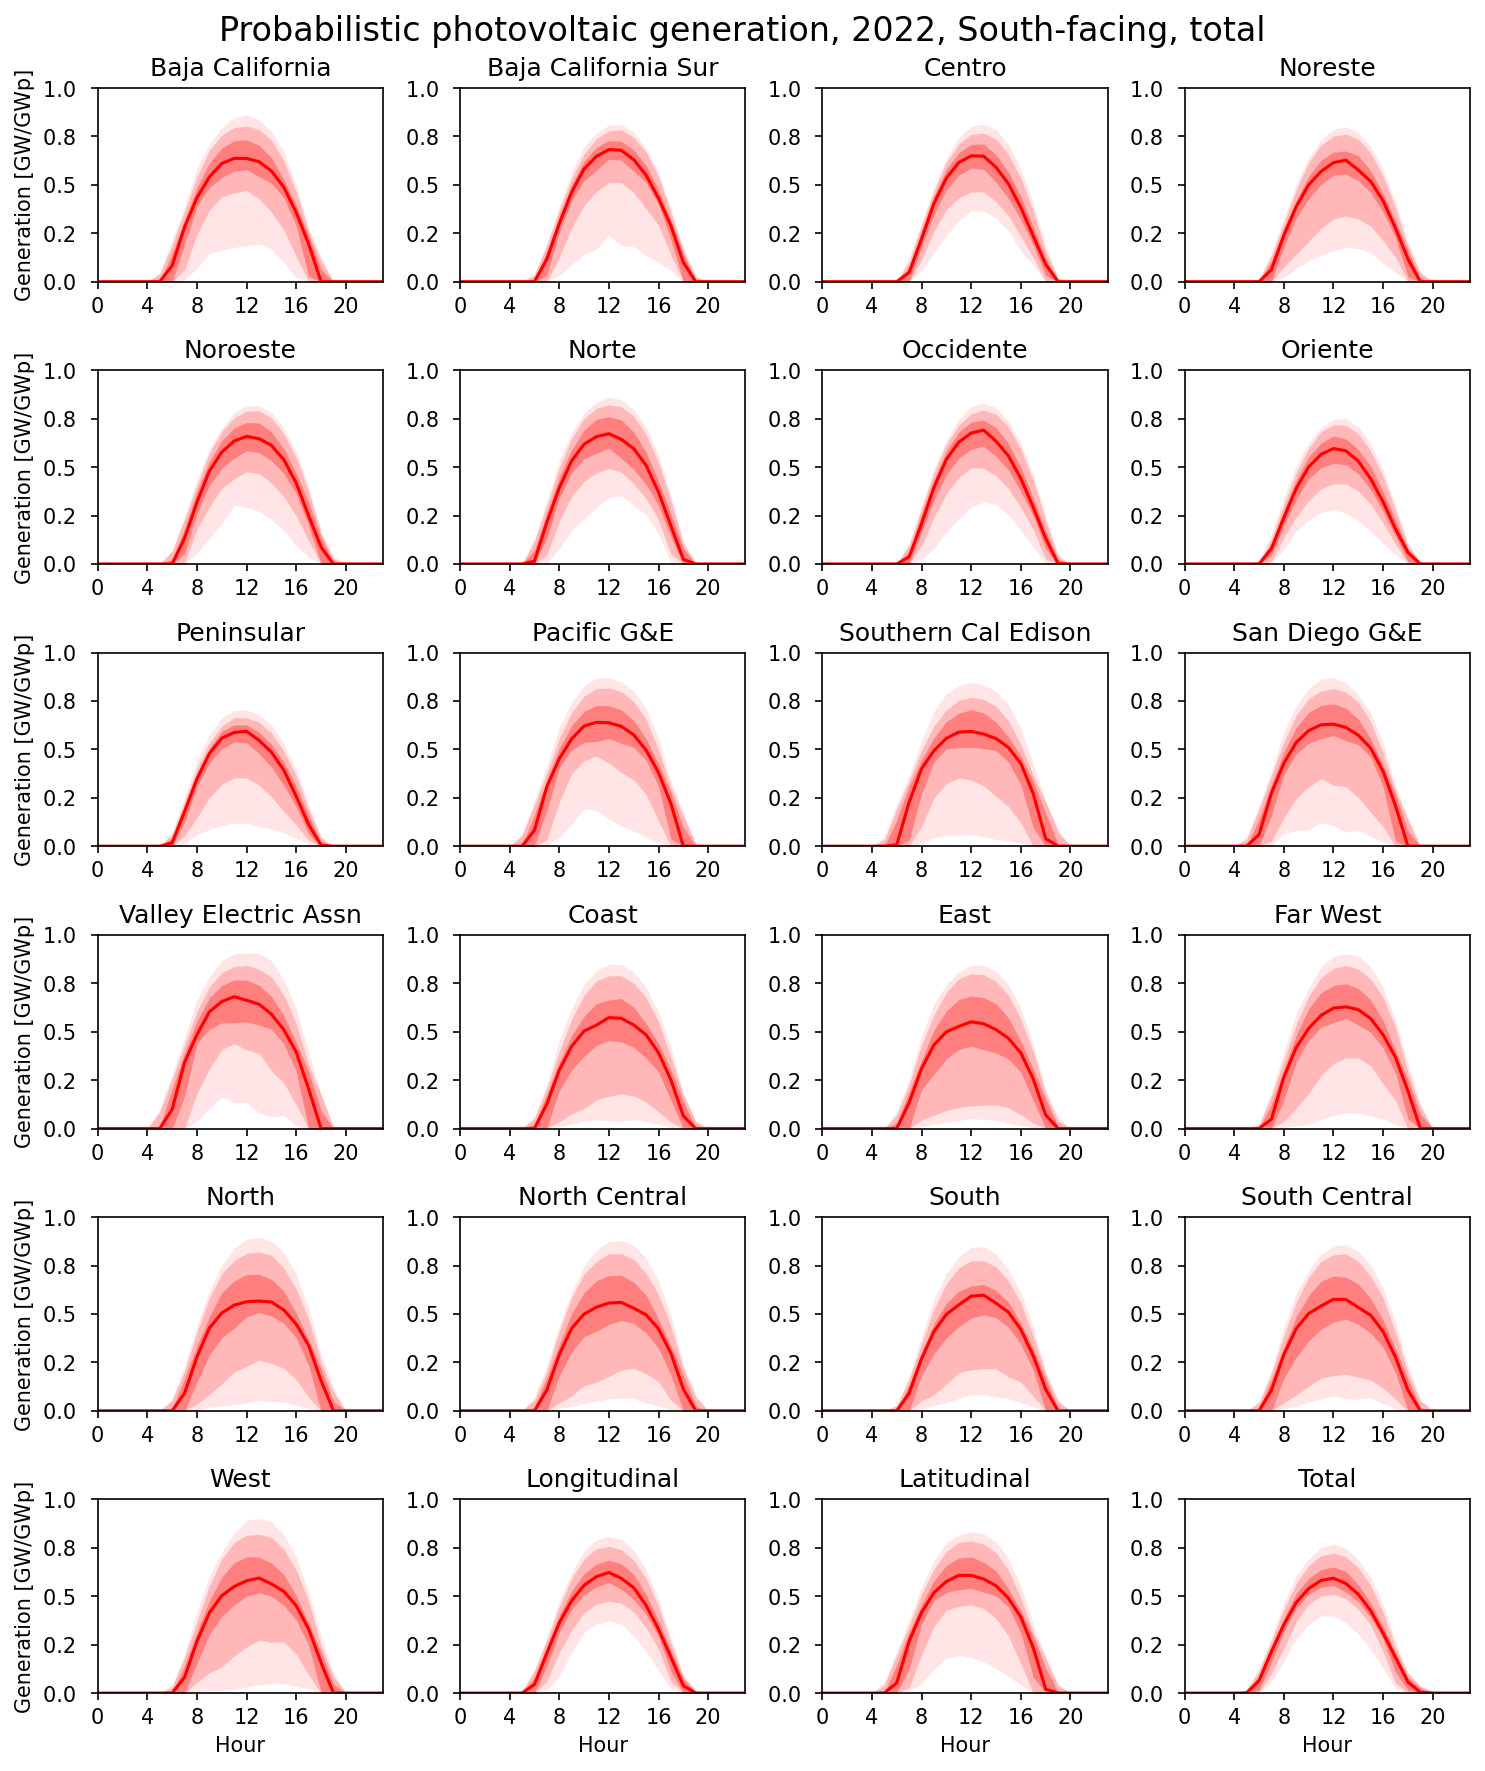

In [ ]:
# Gráfica de demanda total

# Incializamos gráfica
fig, axes = plt.subplots(5, 5)
axes = axes.flatten()
fig.set_facecolor("w")
fig.set_size_inches(10, 12)
fig.set_dpi(150) 

ds_c["hour"] = ds_c["time"].dt.hour.copy()
ds_c["dayofyear"] = ds_c["time"].dt.dayofyear.copy()

n = -8
for i, c in enumerate( ds_c["REGION"].values ):
    reg = NAME_REGION_r(c)
    df = ds_c.sel({"REGION": c}).drop_vars("REGION").to_dataframe()
    if c in [22, 23, 24]: df = df[df.index.dayofyear.isin(range(2, 365))]

    # Procesamos datos
    a = df[ ["hour", "dayofyear", prod_n_centr[n]]
        ].reset_index(drop = True).pivot( index = "hour",
        columns = "dayofyear", values = prod_n_centr[n] )
    b = a.quantile( [0, 0.005, 0.05, 0.25,
        0.5, 0.75, 0.95, 0.995, 1], axis = 1 ).T

    # Graficamos
    axes[i].fill_between(b.index, b[1], b[0],
        color = "red", alpha = 0.1, linewidth = 0)
    #axes[i].fill_between(b.index, b[0.995], b[0.005],
    #  color = "red", alpha = 0.1, linewidth = 0)
    axes[i].fill_between(b.index, b[0.95], b[0.05],
        color = "red", alpha = 0.2, linewidth = 0)
    axes[i].fill_between(b.index, b[0.75], b[0.25],
        color = "red", alpha = 0.3, linewidth = 0)
    axes[i].plot(b.index, b[0.5], color = "red")
    #axes[i].plot( a.index,
    #   a[a.min().sort_values().index[0]], color = "darkred" )

    # Formato de gráfica
    #axes[i].legend( ["Minimum-maximum envelope", "5-95% percentile",
    #    "25-75% percentile", "Median", "Day with minimum demand"] )
    axes[i].set_xlim(0, 23)
    axes[i].set_ylim(0, 1)
    axes[i].xaxis.set_major_locator(plt.MultipleLocator(4))
    axes[i].yaxis.set_major_formatter(StrMethodFormatter("{x:<4.1f}"))
    if i%5 == 0: axes[i].set_ylabel("Generation [GW/GWp]")
    if len(axes) - i <= 5: axes[i].set_xlabel("Hour")
    axes[i].set_title(reg)

# Formato de toda la gráfica
fig.suptitle(f"Probabilistic photovoltaic generation, 2022, "
    + f"{names_dn[n%8]}, {prod_n_i[n].split("_")[-1]}", fontsize = 16)
fig.tight_layout()
plt.show()

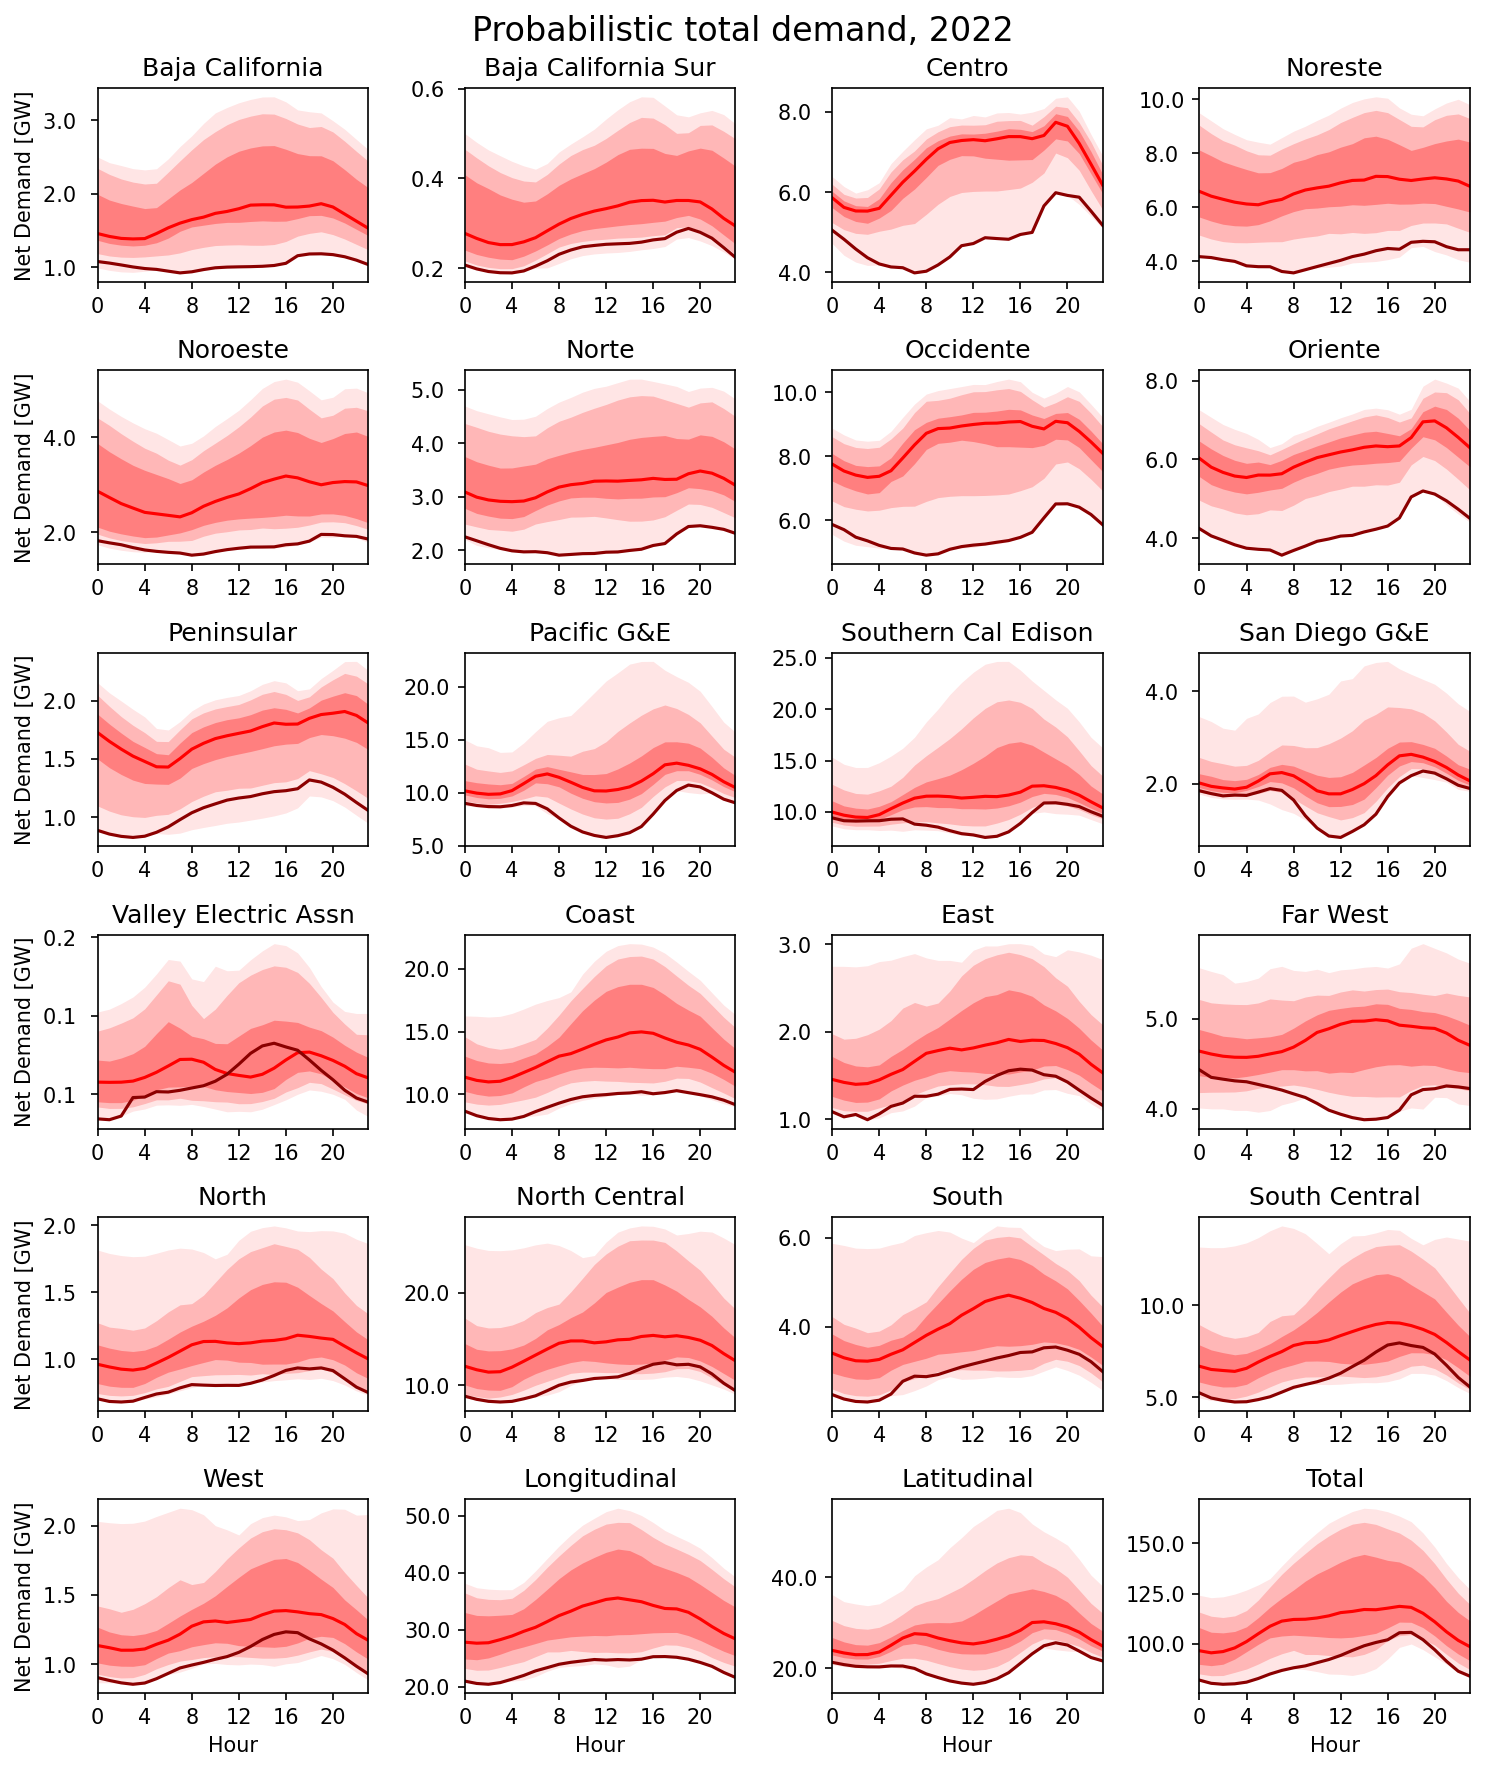

In [ ]:
# Gráfica de demanda total

# Incializamos gráfica
fig, axes = plt.subplots(5, 5)
axes = axes.flatten()
fig.set_facecolor("w")
fig.set_size_inches(10, 12)
fig.set_dpi(150) 

for i, c in enumerate( ds_d["REGION"].values ):
    reg = NAME_REGION_r(c)
    df = ds_d.sel({"REGION": c}).drop_vars("REGION").to_dataframe()
    if c in [22, 23, 24]: df = df[df.index.dayofyear.isin(range(2, 365))]

    # Procesamos datos
    a = df[ ["hour", "dayofyear", "Demand"]
        ].reset_index(drop = True).pivot( index = "hour",
        columns = "dayofyear", values = "Demand" ) / 1000
    b = a.quantile( [0, 0.005, 0.05, 0.25,
        0.5, 0.75, 0.95, 0.995, 1], axis = 1 ).T

    # Graficamos
    axes[i].fill_between(b.index, b[1], b[0],
        color = "red", alpha = 0.1, linewidth = 0)
    #axes[i].fill_between(b.index, b[0.995], b[0.005],
    #  color = "red", alpha = 0.1, linewidth = 0)
    axes[i].fill_between(b.index, b[0.95], b[0.05],
        color = "red", alpha = 0.2, linewidth = 0)
    axes[i].fill_between(b.index, b[0.75], b[0.25],
        color = "red", alpha = 0.3, linewidth = 0)
    axes[i].plot(b.index, b[0.5], color = "red")
    axes[i].plot( a.index,
       a[a.min().sort_values().index[0]], color = "darkred" )

    # Formato de gráfica
    #axes[i].legend( ["Minimum-maximum envelope", "5-95% percentile",
    #    "25-75% percentile", "Median", "Day with minimum demand"] )
    axes[i].set_xlim(0, 23)
    #axes[i].set_ylim(0, 20000)
    axes[i].xaxis.set_major_locator(plt.MultipleLocator(4))
    axes[i].yaxis.set_major_formatter(StrMethodFormatter("{x:<4.1f}"))
    if i%5 == 0: axes[i].set_ylabel("Net Demand [GW]")
    if len(axes) - i <= 5: axes[i].set_xlabel("Hour")
    axes[i].set_title(reg)

# Formato de toda la gráfica
fig.suptitle(f"Probabilistic total demand, 2022",
    fontsize = 16)
fig.tight_layout()
plt.show()

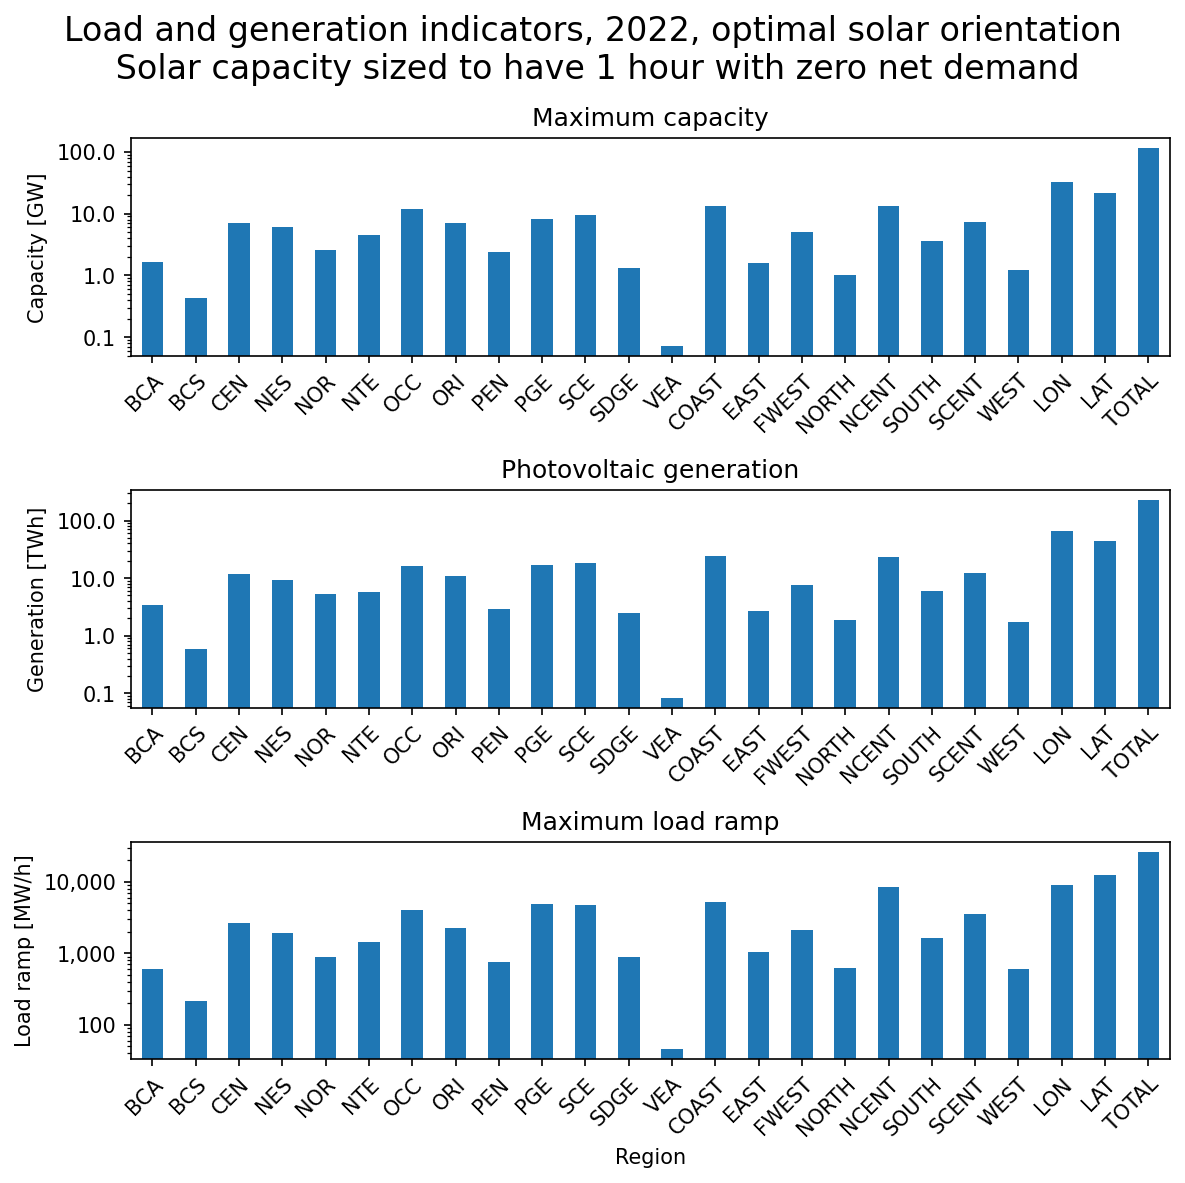

In [11]:
# Comparamos cada variable para las distintas regiones

# Escogemos la configuración ideal para cada región
conf_i = max_score.apply(lambda x: names_dn.index(x))

# Incializamos gráfica
fig, axes = plt.subplots(3)
axes = axes.flatten()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

# Maximum capacity
df_r_2 = pd.DataFrame(index = df_r.index, columns = ["Data"])
for c in df_r_2.index.values:
    df_r_2.loc[c] = df_r.loc[c, prod_n_cap[24 + conf_i[NUM_REGION(c)]]]
df_r_2.plot.bar( ax = axes[0], legend = False )
axes[0].set_title("Maximum capacity")
axes[0].set_xlabel("")
axes[0].set_ylabel("Capacity [GW]")
axes[0].set_yscale("log")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45,
    ha = "right", rotation_mode = "anchor")
axes[0].yaxis.set_major_formatter(StrMethodFormatter("{x:,.1f}"))

# Photovoltaic generation
df_r_2 = pd.DataFrame(index = df_r.index, columns = ["Data"])
for c in df_r_2.index.values:
    df_r_2.loc[c] = df_r.loc[c, ener[24 + conf_i[NUM_REGION(c)]]]
df_r_2.plot.bar( ax = axes[1], legend = False )
axes[1].set_title("Photovoltaic generation")
axes[1].set_xlabel("")
axes[1].set_ylabel("Generation [TWh]")
axes[1].set_yscale("log")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45,
    ha = "right", rotation_mode = "anchor")
axes[1].yaxis.set_major_formatter(StrMethodFormatter("{x:,.1f}"))

# Maximum load ramp
df_r_2 = pd.DataFrame(index = df_r.index, columns = ["Data"])
for c in df_r_2.index.values: df_r_2.loc[c] = df_r.loc[
    c, track_net_demand_dt_max[24 + conf_i[NUM_REGION(c)]]]
df_r_2.plot.bar( ax = axes[2], legend = False )
axes[2].set_title("Maximum load ramp")
axes[2].set_xlabel("Region")
axes[2].set_ylabel("Load ramp [MW/h]")
axes[2].set_yscale("log")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation = 45,
    ha = "right", rotation_mode = "anchor")
axes[2].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

# Formato de toda la gráfica
fig.suptitle("Load and generation indicators, 2022, optimal solar orientation"
    + "\n Solar capacity sized to have 1 hour with zero net demand",
    fontsize = 16)
fig.tight_layout()
plt.show()

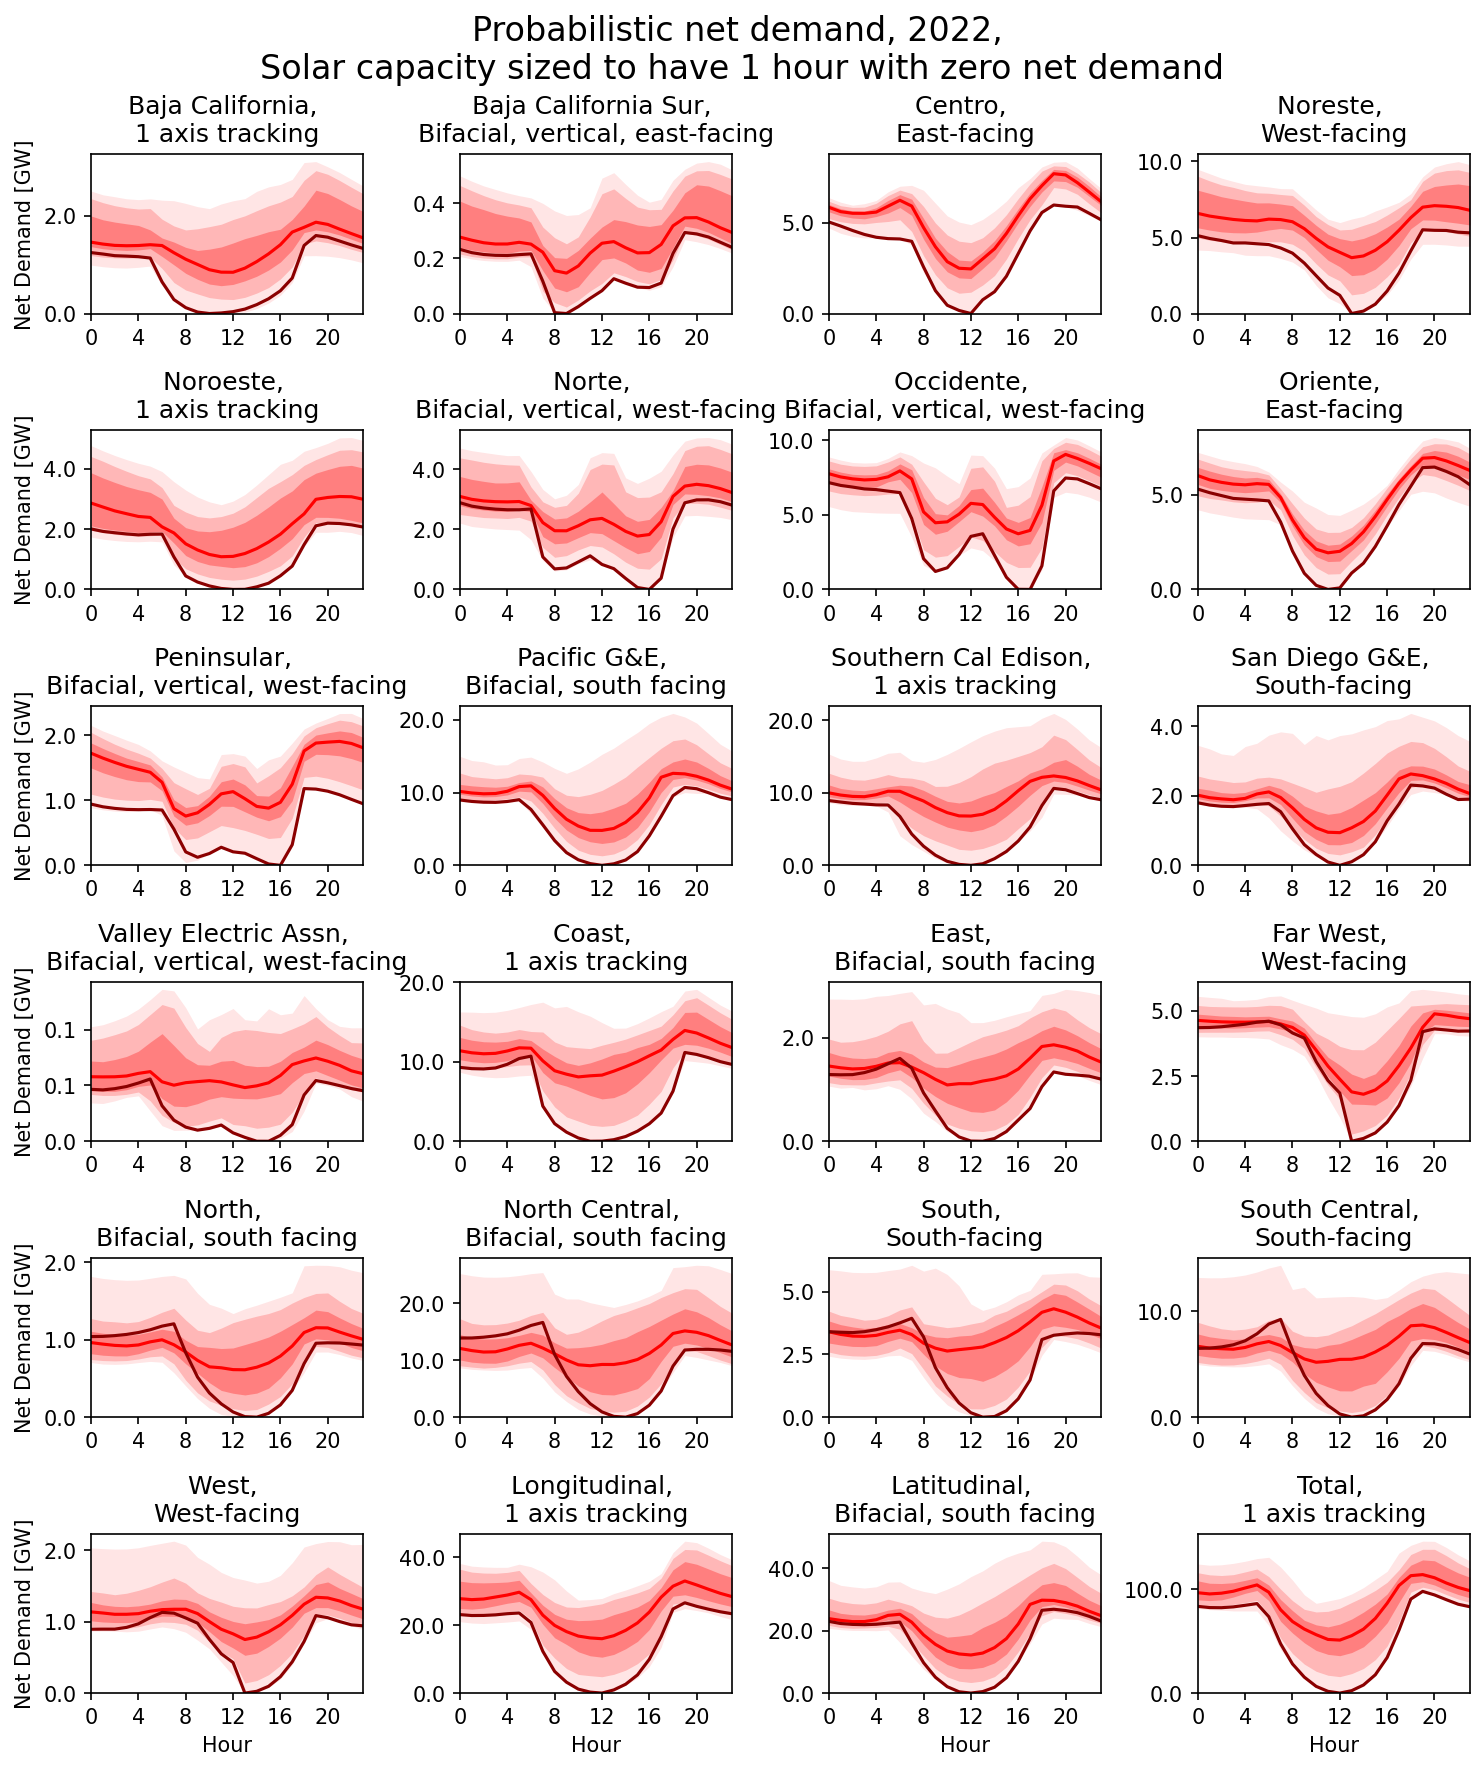

In [ ]:
# Gráfica de demanda neta

# Incializamos gráfica
fig, axes = plt.subplots(5, 5)
axes = fig.axes
fig.set_facecolor("w")
fig.set_size_inches(10, 12)
fig.set_dpi(150) 

n = 24
# Iteramos para cada gráfica
for i, ax in enumerate(axes):
    # Procesamos datos
    c = ds_c["REGION"].values[i]
    a = ds_c.sel({"REGION": c}).drop_vars("REGION")[ [ "hour", "dayofyear",
        track_net_demand[n + conf_i[c]] ] ].to_dataframe()
    a[track_net_demand[n + conf_i[c]]] /= 1000
    a = a.reset_index(drop = True).pivot( index = "hour",
        columns = "dayofyear", values = track_net_demand[n + conf_i[c]] )
    b = a.quantile( [0, 0.005, 0.05, 0.25,
        0.5, 0.75, 0.95, 0.995, 1], axis = 1) .T

    # Graficamos
    ax.fill_between(b.index, b[1], b[0],
        color = "red", alpha = 0.1, linewidth = 0)
    #ax.fill_between(b.index, b[0.995], b[0.005],
    #    color = "red", alpha = 0.1, linewidth = 0)
    ax.fill_between(b.index, b[0.95], b[0.05],
        color = "red", alpha = 0.2, linewidth = 0)
    ax.fill_between(b.index, b[0.75], b[0.25],
        color = "red", alpha = 0.3, linewidth = 0)
    ax.plot(b.index, b[0.5], color = "red")
    ax.plot(a.index, a[ a.min().sort_values().index[0] ], color = "darkred")

    ax.set_title(f"{NAME_REGION_r(c)}, \n{names_dn[conf_i[c]]}")
    ax.set_xlim(0, 23)
    ax.set_ylim(0)
    #ax.set_ylim(0, 10000)
    ax.xaxis.set_major_locator(plt.MultipleLocator(4))
    ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.1f}"))
    if i%5 == 0: ax.set_ylabel("Net Demand [GW]")
    if len(axes) - i <= 5: ax.set_xlabel("Hour")

# Formato de toda la gráfica
fig.suptitle(f"Probabilistic net demand, 2022, \n"
    + "Solar capacity sized to have 1 hour with zero net demand",
    fontsize = 16)
fig.tight_layout()
plt.show()

# Resumen por región

In [ ]:
# Escogemos los datos de una región
c = 25
reg = NAME_REGION_r(c)
df = ds_c.sel({"REGION": c}).drop_vars("REGION").to_dataframe()

# Resultados de producción fotovoltaica, 
# diferencia entre datos sin y con ponderación
pd.options.display.float_format = "{:,.2f} %".format
a = ds_c[prod_n_cap[0:8]].to_dataframe()
b = ds_c[prod_n_cap[24:32]].to_dataframe()
diff_weight = (1 - a / b.values)*100
diff_weight.columns = names_dn
print(f"Mean weighting error: {diff_weight.mean().mean():.3f}%")
diff_weight

Mean weighting error: 0.381%


,South-facing,West-facing,East-facing,1 axis tracking,2 axis tracking,"Bifacial, vertical, west-facing","Bifacial, vertical, east-facing","Bifacial, south facing"
REGION,,,,,,,,
1,-5.82 %,4.06 %,2.11 %,2.28 %,-4.94 %,1.22 %,5.10 %,-5.93 %
2,1.21 %,0.82 %,0.92 %,0.92 %,0.77 %,-0.81 %,1.32 %,1.08 %
3,-1.76 %,-0.65 %,-0.83 %,-0.88 %,-1.90 %,0.69 %,-2.03 %,-1.76 %
4,2.97 %,-0.46 %,-0.30 %,-0.29 %,2.81 %,2.39 %,1.37 %,2.65 %
5,-1.52 %,0.46 %,0.56 %,0.54 %,-0.44 %,2.01 %,0.68 %,-1.45 %
6,2.91 %,-0.56 %,-0.37 %,-0.40 %,2.57 %,-0.50 %,0.03 %,2.63 %
7,-0.54 %,-0.43 %,0.73 %,-0.24 %,-0.58 %,2.50 %,-0.35 %,-0.60 %
8,-0.01 %,-0.57 %,-1.56 %,-2.04 %,0.06 %,-1.52 %,-2.54 %,-0.06 %
9,2.75 %,2.73 %,-2.83 %,-1.15 %,-0.82 %,0.40 %,-2.98 %,2.32 %


/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_11834/3646957009.py:35: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend( ["_", "5-95% percentile"],
/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_11834/3646957009.py:38: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend( ["_", "_", "25-75% percentile"],
/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_11834/3646957009.py:41: MatplotlibDeprecationWarning: An artist whose label starts with an unders

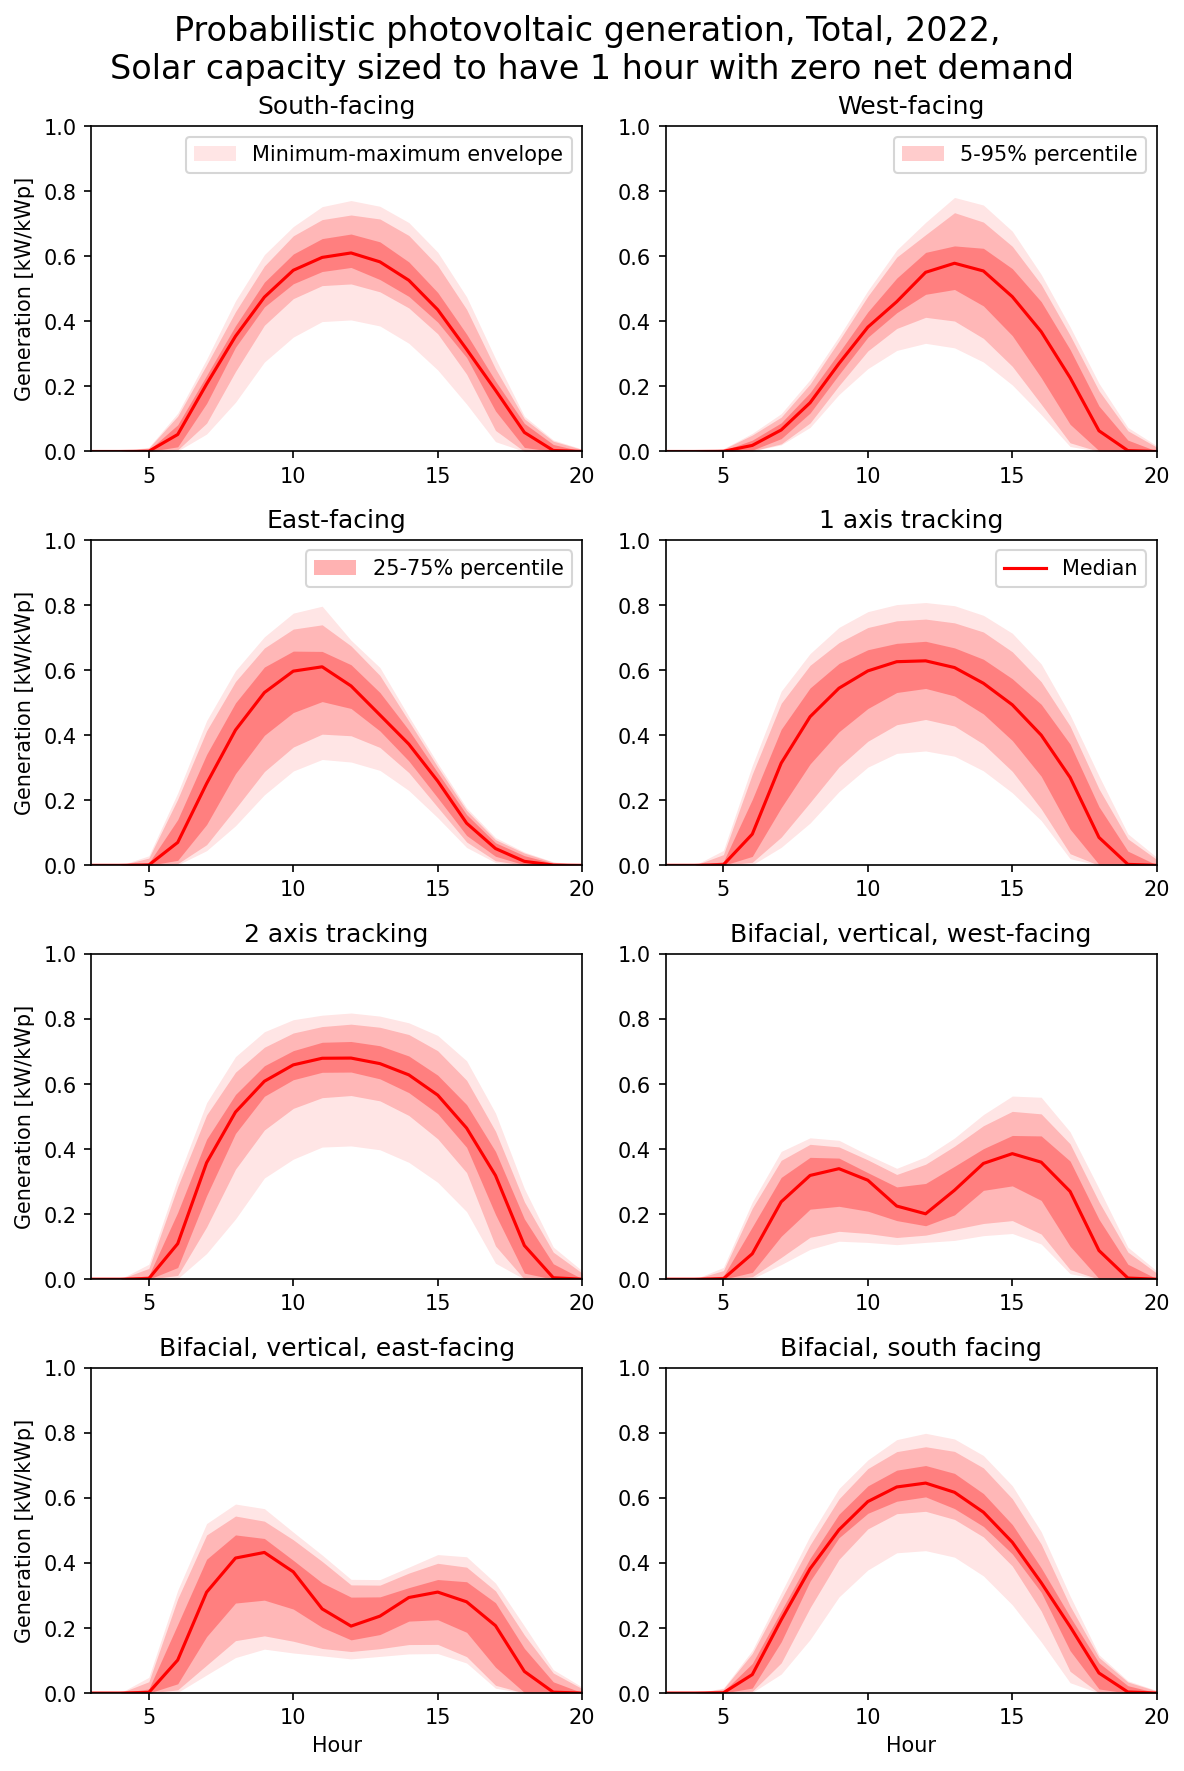

In [14]:
# Gráfica de producción fotovoltaica

# Incializamos gráfica
fig, axes = plt.subplots(4, 2)
axes = fig.axes
fig.set_facecolor("w")
fig.set_size_inches(8, 12)
fig.set_dpi(150) 

# Iteramos para cada gráfica
for i, ax in enumerate(axes):
    # Procesamos los datos
    a = df[ ["hour", "dayofyear", prod_n[i]]
        ].reset_index(drop = True).pivot( index = "hour",
        columns = "dayofyear", values = prod_n[i] )
    b = a.quantile( [0, 0.005, 0.05, 0.25,
        0.5, 0.75, 0.95, 0.995, 1], axis = 1 ).T

    # Graficamos
    ax.fill_between(b.index, b[1], b[0],
        color = "red", alpha = 0.1, linewidth = 0)
    #ax.fill_between(b.index, b[0.995], b[0.005],
    #    color = "red", alpha = 0.1, linewidth = 0)
    ax.fill_between(b.index, b[0.95], b[0.05],
        color = "red", alpha = 0.2, linewidth = 0)
    ax.fill_between(b.index, b[0.75], b[0.25],
        color = "red", alpha = 0.3, linewidth = 0)
    ax.plot(b.index, b[0.5], color = "red")

    # Formato de gráfica
    if   i == 0:
        ax.legend( ["Minimum-maximum envelope"],
            prop = { "size": 10 }, ncol = 2 )
    elif i == 1:
        ax.legend( ["_", "5-95% percentile"],
            prop = { "size": 10 }, ncol = 2 )
    elif i == 2:
        ax.legend( ["_", "_", "25-75% percentile"],
            prop = { "size": 10 }, ncol = 2 )
    elif i == 3:
        ax.legend( ["_", "_", "_", "Median"],
            prop = { "size": 10 }, ncol = 2 )
    ax.set_title(names_dn[i])
    ax.set_xlim(3, 20)
    ax.set_ylim(0, 1)
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.1f}"))
    if i%2 == 0: ax.set_ylabel("Generation [kW/kWp]")
    if len(axes) - i <= 2: ax.set_xlabel("Hour")

# Formato de toda la gráfica
fig.suptitle(f"Probabilistic photovoltaic generation, {reg}, 2022, \n"
    + "Solar capacity sized to have 1 hour with zero net demand",
    fontsize = 16)
fig.tight_layout()
plt.show()

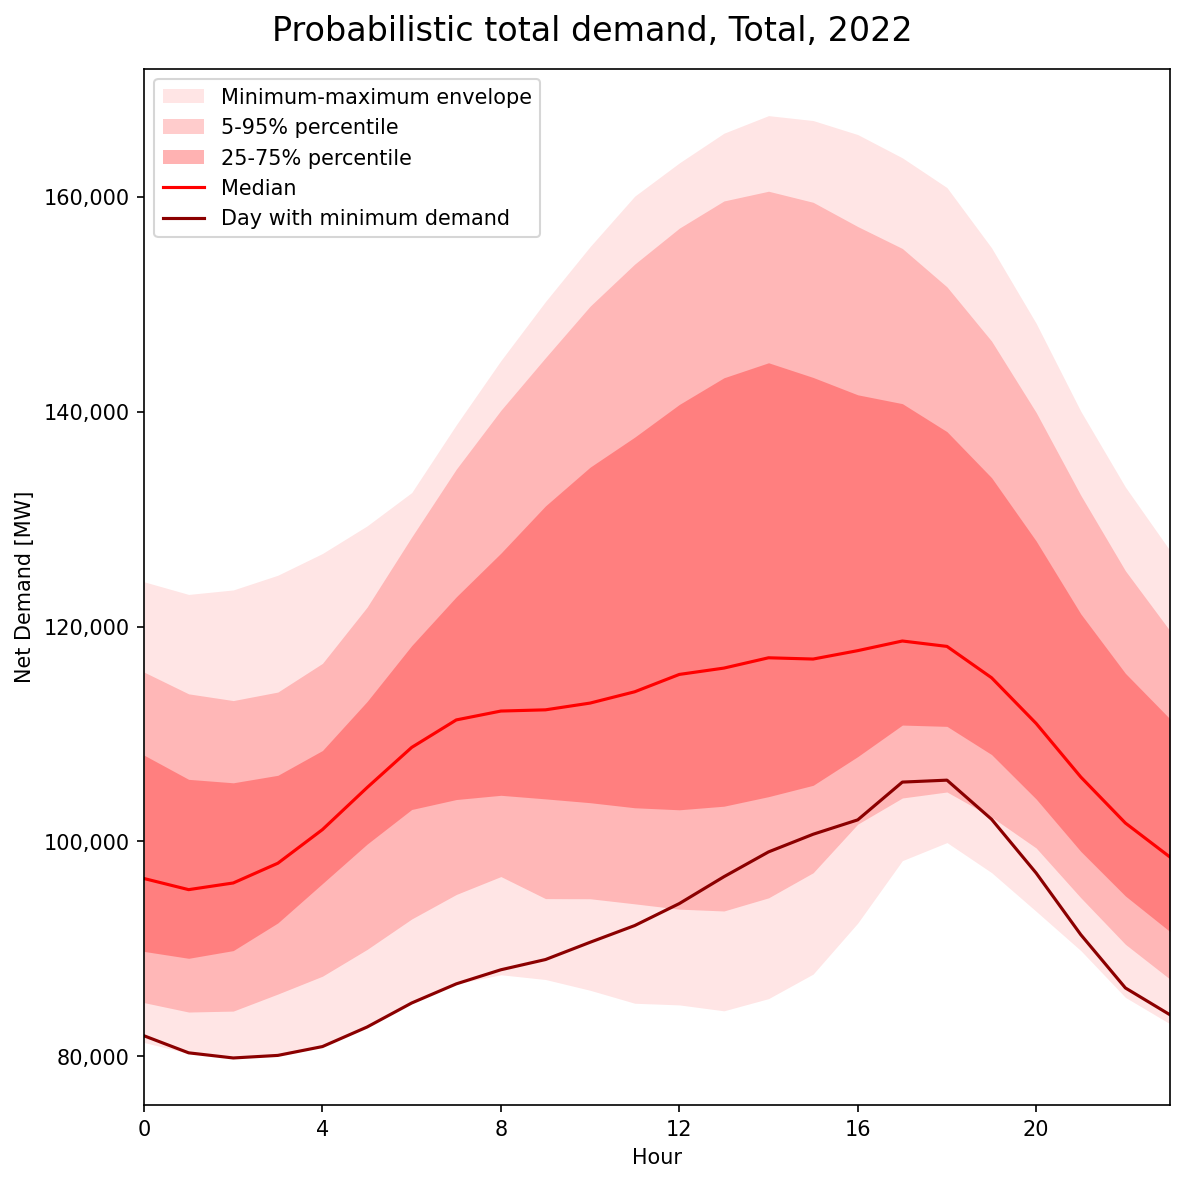

In [15]:
# Gráfica de demanda total

# Incializamos gráfica
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

# Procesamos datos
a = df[ ["hour", "dayofyear", "Demand"]
    ].reset_index(drop = True).pivot( index = "hour",
    columns = "dayofyear", values = "Demand" )
if c in [22, 23, 24]: a = a.drop(columns = [1, 365])
b = a.quantile([0, 0.005, 0.05, 0.25, 0.5, 0.75, 0.95, 0.995, 1], axis = 1).T

# Graficamos
ax.fill_between(b.index, b[1], b[0],
    color = "red", alpha = 0.1, linewidth = 0)
#ax.fill_between(b.index, b[0.995], b[0.005],
#    color = "red", alpha = 0.1, linewidth = 0)
ax.fill_between(b.index, b[0.95], b[0.05],
    color = "red", alpha = 0.2, linewidth = 0)
ax.fill_between(b.index, b[0.75], b[0.25],
    color = "red", alpha = 0.3, linewidth = 0)
ax.plot(b.index, b[0.5], color = "red")
ax.plot(a.index, a[ a.min().sort_values().index[0] ], color = "darkred")

# Formato de gráfica
ax.legend( ["Minimum-maximum envelope", "5-95% percentile",
    "25-75% percentile", "Median",
    "Day with minimum demand"], loc = "upper left" )
ax.set_xlim(0, 23)
#ax.set_ylim(3500, 8500)
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax.set_ylabel("Net Demand [MW]")
ax.set_xlabel("Hour")
fig.suptitle(f"Probabilistic total demand, {reg}, 2022",
    fontsize = 16)
fig.tight_layout()
plt.show()

In [16]:
# Resultados para cada configuración
results = [ prod_n_sum_i[-8:], prod_n_cap[-8:], ener[-8:], cap_f[-8:],
     track_net_demand_max[-8:], track_net_demand_dt_max[-8:] ]
indicators = [ "Photovoltaic production per kWp", "Maximum capacity",
    "Photovoltaic production", "Capacity factor",
    "Maximum load", "Maximum load ramp" ]
format = [ "{:,.0f} kWh/kWp".format, "{:.1f} GW".format,
           "{:,.0f} TWh".format, "{:.1f} %".format,
           "{:,.0f} MW".format, "{:,.0f} MW".format]

for i in range(len(results)):
    print(indicators[i])
    pd.options.display.float_format = format[i]
    a = df[results[i]].iloc[i]
    a.index = names_dn
    print( a.sort_values(ascending = False).to_string() )
    print()

Photovoltaic production per kWp
2 axis tracking                   2,250 kWh/kWp
1 axis tracking                   1,978 kWh/kWp
Bifacial, south facing            1,897 kWh/kWp
South-facing                      1,782 kWh/kWp
East-facing                       1,501 kWh/kWp
West-facing                       1,485 kWh/kWp
Bifacial, vertical, east-facing   1,203 kWh/kWp
Bifacial, vertical, west-facing   1,194 kWh/kWp

Maximum capacity
Bifacial, vertical, west-facing   181.0 GW
Bifacial, vertical, east-facing   177.0 GW
West-facing                       120.5 GW
East-facing                       118.6 GW
1 axis tracking                   115.6 GW
South-facing                      115.0 GW
Bifacial, south facing            110.9 GW
2 axis tracking                   109.9 GW

Photovoltaic production
2 axis tracking                   247 TWh
1 axis tracking                   229 TWh
Bifacial, vertical, west-facing   216 TWh
Bifacial, vertical, east-facing   213 TWh
Bifacial, south facing       

/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_11834/1038404321.py:36: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend( ["_", "5-95% percentile"],
/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_11834/1038404321.py:39: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend( ["_", "_", "25-75% percentile"],
/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_11834/1038404321.py:42: MatplotlibDeprecationWarning: An artist whose label starts with an unders

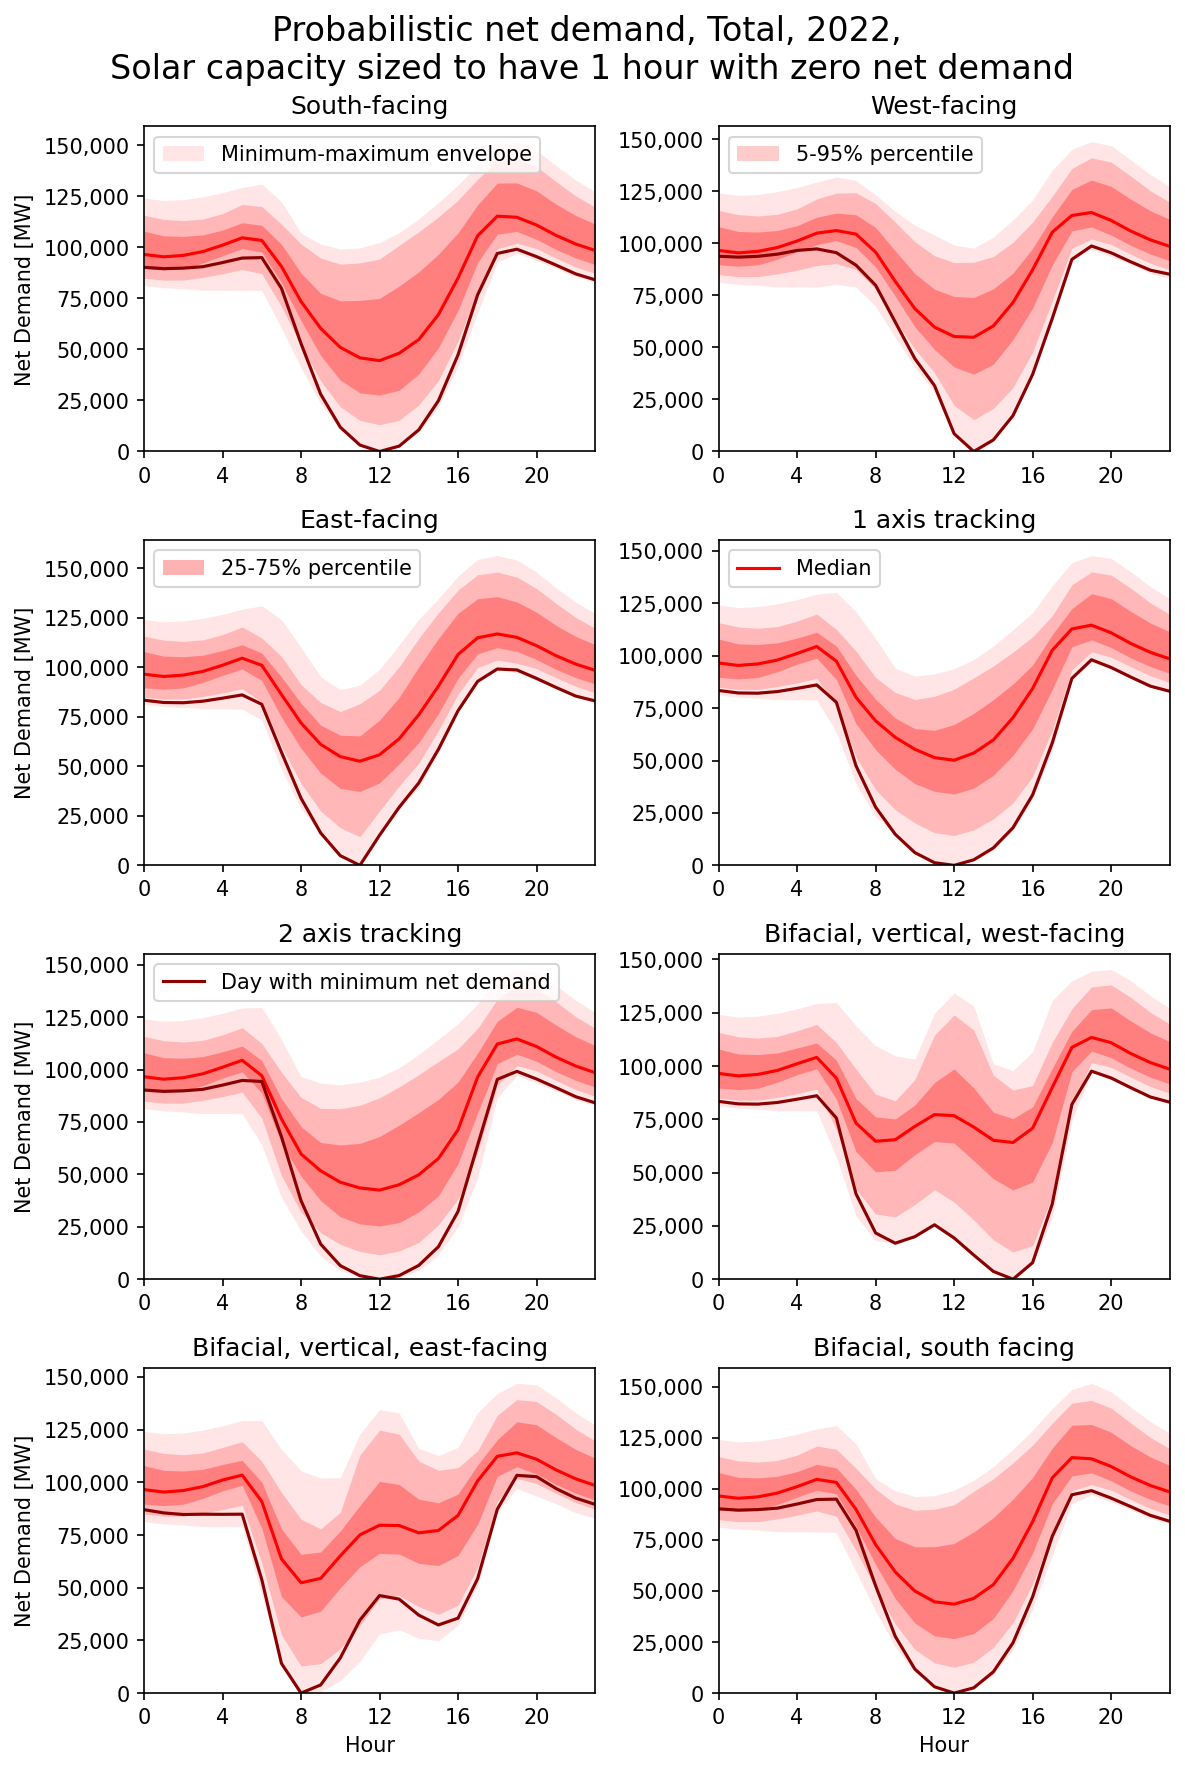

In [17]:
# Gráfica de demanda neta

# Incializamos gráfica
fig, axes = plt.subplots(4, 2)
axes = fig.axes
fig.set_facecolor("w")
fig.set_size_inches(8, 12)
fig.set_dpi(150) 

# Iteramos para cada gráfica
for i, ax in enumerate(axes):
    # Procesamos datos
    a = df[ ["hour", "dayofyear", track_net_demand[i]]
        ].reset_index(drop = True).pivot( index = "hour",
        columns = "dayofyear", values = track_net_demand[i] )
    b = a.quantile( [0, 0.005, 0.05, 0.25,
        0.5, 0.75, 0.95, 0.995, 1], axis = 1) .T

    # Graficamos
    ax.fill_between(b.index, b[1], b[0],
        color = "red", alpha = 0.1, linewidth = 0)
    #ax.fill_between(b.index, b[0.995], b[0.005],
    #    color = "red", alpha = 0.1, linewidth = 0)
    ax.fill_between(b.index, b[0.95], b[0.05],
        color = "red", alpha = 0.2, linewidth = 0)
    ax.fill_between(b.index, b[0.75], b[0.25],
        color = "red", alpha = 0.3, linewidth = 0)
    ax.plot(b.index, b[0.5], color = "red")
    ax.plot(a.index, a[ a.min().sort_values().index[0] ], color = "darkred")

    # Formato de gráfica
    if   i == 0:
        ax.legend( ["Minimum-maximum envelope"],
            loc = "upper left", prop = { "size": 10 }, ncol = 2 )
    elif i == 1:
        ax.legend( ["_", "5-95% percentile"],
            loc = "upper left", prop = { "size": 10 }, ncol = 2 )
    elif i == 2:
        ax.legend( ["_", "_", "25-75% percentile"],
            loc = "upper left", prop = { "size": 10 }, ncol = 2 )
    elif i == 3:
        ax.legend( ["_", "_", "_", "Median"],
            loc = "upper left", prop = { "size": 10 }, ncol = 2 )
    elif i == 4:
        ax.legend( ["_", "_", "_", "_", "Day with minimum net demand"],
            loc = "upper left", prop = { "size": 10 }, ncol = 2 )
    ax.set_title(names_dn[i])
    ax.set_xlim(0, 23)
    ax.set_ylim(0)
    #ax.set_ylim(0, 10000)
    ax.xaxis.set_major_locator(plt.MultipleLocator(4))
    ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
    if i%2 == 0: ax.set_ylabel("Net Demand [MW]")
    if len(axes) - i <= 2: ax.set_xlabel("Hour")

# Formato de toda la gráfica
fig.suptitle(f"Probabilistic net demand, {reg}, 2022, \n"
    + "Solar capacity sized to have 1 hour with zero net demand",
    fontsize = 16)
fig.tight_layout()
plt.show()

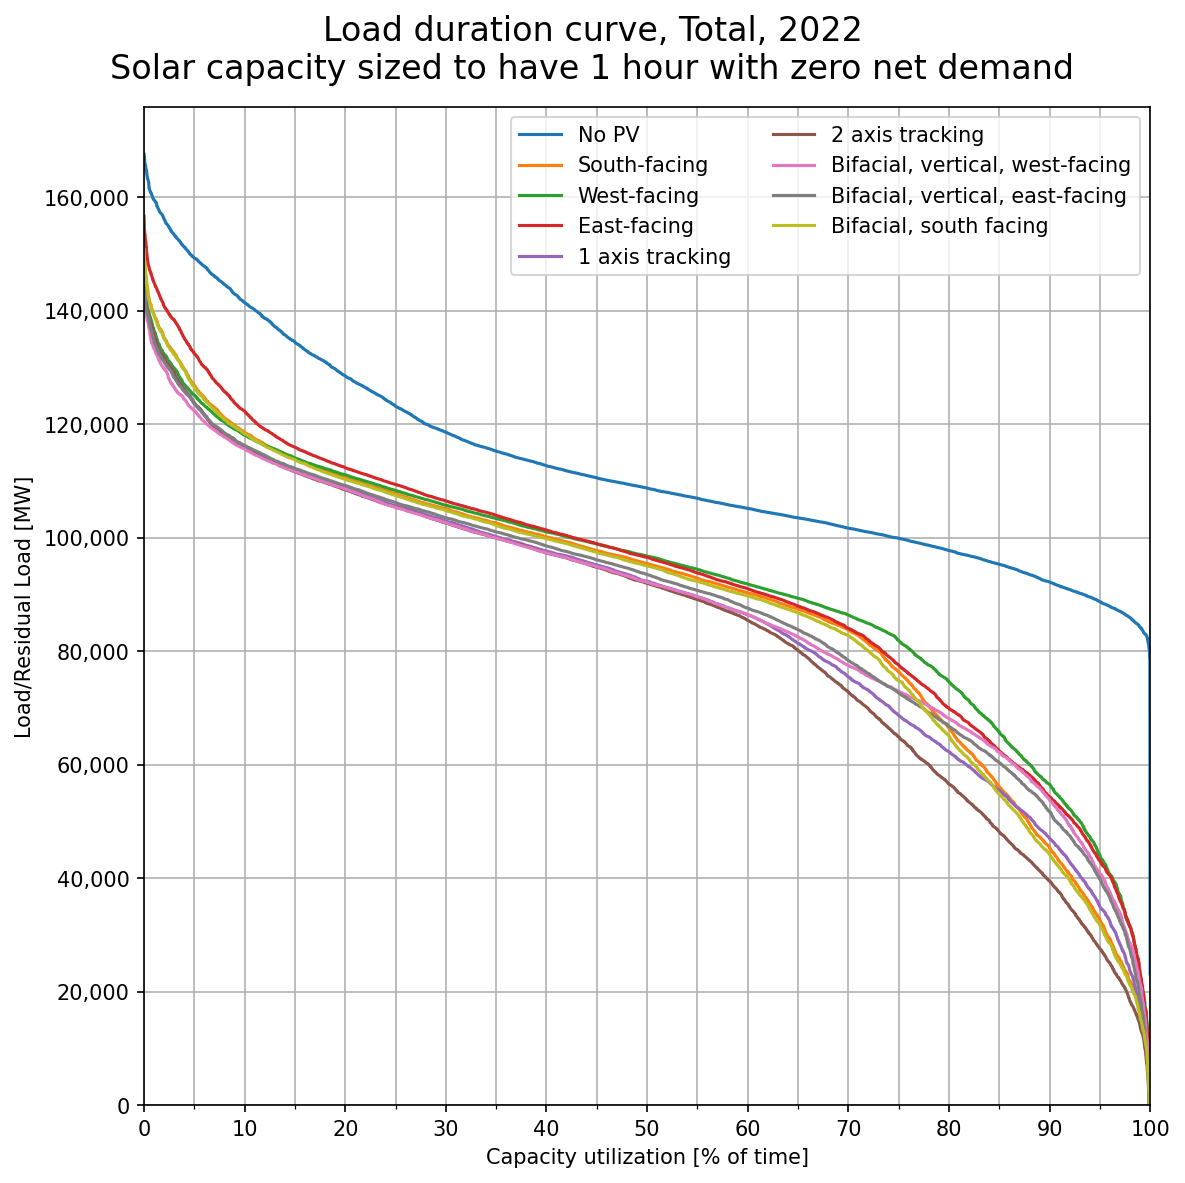

In [18]:
# Load duration curve

# Incializamos gráfica
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

# Iteramos para cada caso
for v in ["Demand"] + track_net_demand[24:]:
    a = df[ [v] ].sort_values( v, ascending = False ).reset_index(drop = True)
    a.index /= 2
    a.index = a.index / a.index.max() * 100
    ax.plot(a.index, a[v])

# Formato de gráfica
ax.legend( ["No PV"] + names_dn, ncol = 2 )
ax.set_xlim(0, 100)
#ax.set_ylim(0, 8500)
ax.set_ylim(0)
ax.grid("both", "both")
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
#ax.yaxis.set_major_locator(plt.MultipleLocator(1000))
#ax.yaxis.set_minor_locator(plt.MultipleLocator(500))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax.set_ylabel("Load/Residual Load [MW]")
ax.set_xlabel("Capacity utilization [% of time]")
fig.suptitle(f"Load duration curve, {reg}, 2022\n"
    + "Solar capacity sized to have 1 hour with zero net demand",
    fontsize = 16)
fig.tight_layout()
plt.show()

/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_11834/486648188.py:27: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  axes[0].legend( ["No PV"] + names_dn[:4] + ["_"]*4, ncol = 1 )
/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_11834/486648188.py:41: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  axes[1].legend( ["_"]*4 + names_dn[4:], ncol = 1 )


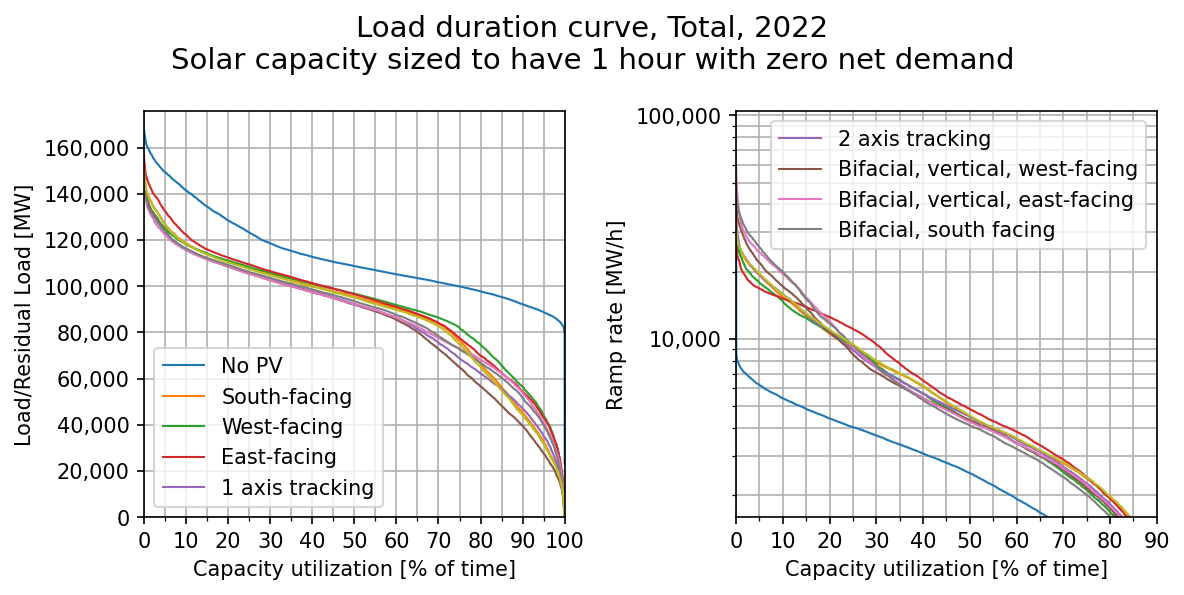

In [19]:
# Load duration curve + ramp duration curve

# Incializamos gráfica
fig, axes = plt.subplots(1, 2)
axes = axes.flatten()
fig.set_facecolor("w")
fig.set_size_inches(8, 4)
fig.set_dpi(150) 

# Iteramos para cada caso
for v in ["Demand"] + track_net_demand[24:]:
    a = df[ [v] ].sort_values( v, ascending = False ).reset_index(drop = True)
    a.index /= 2
    a.index = a.index / a.index.max() * 100
    axes[0].plot(a.index, a[v], linewidth = 1)

# Iteramos para cada caso
for v in ["Demand_dt"] + track_net_demand_dt[24:]:
    a = np.abs(df[[v]]).sort_values( v,
        ascending = False ).reset_index(drop = True)
    a = a.where(a>0, 0)
    a.index = a.index / a.index.max() * 100
    if v == "Demand_dt": min_dt = np.round(a.iloc[5840]).values[0]
    axes[1].plot(a.index, a[v], linewidth = 1)

# Formato de gráfica
axes[0].legend( ["No PV"] + names_dn[:4] + ["_"]*4, ncol = 1 )
axes[0].set_xlim(0, 100)
#axes[0].set_ylim(0, 8500)
axes[0].set_ylim(0)
axes[0].grid("both", "both")
axes[0].xaxis.set_major_locator(plt.MultipleLocator(10))
axes[0].xaxis.set_minor_locator(plt.MultipleLocator(5))
#axes[0].yaxis.set_major_locator(plt.MultipleLocator(1000))
#axes[0].yaxis.set_minor_locator(plt.MultipleLocator(500))
axes[0].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
axes[0].set_ylabel("Load/Residual Load [MW]")
axes[0].set_xlabel("Capacity utilization [% of time]")

# Formato de gráfica
axes[1].legend( ["_"]*4 + names_dn[4:], ncol = 1 )
axes[1].set_yscale("log")
axes[1].set_xlim(0, 90)
axes[1].set_ylim(min_dt)
axes[1].grid("both", "both")
axes[1].xaxis.set_major_locator(plt.MultipleLocator(10))
axes[1].xaxis.set_minor_locator(plt.MultipleLocator(5))
axes[1].yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
axes[1].set_ylabel("Ramp rate [MW/h]")
axes[1].set_xlabel("Capacity utilization [% of time]")

fig.suptitle(f"Load duration curve, {reg}, 2022\n"
    + "Solar capacity sized to have 1 hour with zero net demand",
    fontsize = 14)
fig.tight_layout()
plt.show()